# Problem Statement-Time Series Forecasting

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### Import Neccessary packages

In [1]:
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Importing Libraries
import numpy as np # Numerical libraries
import pandas as pd # to handle data in form of rows and columns

# For Visualisation-import ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns
# The following code is to set the subsequent figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

# To calculate accuracy measures
from sklearn import metrics

# Dataset - Rose:

## Dataset Background:

- Monthly Sales Data of 'Rose' Wine manufactured by ABC Estate Wines starting from Jan 1980 to July 1995 is provided.
- As an analyst in the ABC Estate Wines, the task is to analyse and forecast Wine Sales in the 20th century.

## Data Dictionary of the Dataset:

- The dataset 'Rose' contain two columns of data:
- The monthly time stamp from Jan 1980 to July 1995 and the sales corresponding to the wines.

### Loading the Dataset as Time Series data:

# 1.1 Read the data as an appropriate Time Series data and plot the data.

### Method-1

In [2]:
# Read the Rose Dataset
df_rose = pd.read_csv('Rose.csv')
df_rose.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


### Create Time Stamps and adding it to the data frame to make it a Time Series Data

In [3]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
# Adding the time stamp to the data frame
df_rose['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_rose.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [5]:
# Set Time_Stamp as an index
df_rose.set_index('Time_Stamp',inplace=True)
df_rose.drop(['YearMonth'], axis=1, inplace=True)
df_rose.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


### Method-2

In [6]:
## Alternate way of reading the data as time series.
## Squeeze = True will return the index col as series
rose = pd.read_csv('Rose.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)
printmd('**View the top 5 rows of Rose dataset :**')
rose.head()

**View the top 5 rows of Rose dataset :**

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

In [7]:
printmd('**View the bottom 5 rows of Rose dataset :**')
rose.tail()

**View the bottom 5 rows of Rose dataset :**

YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64

## Inferences:

- All values are properly loaded for the dataset with the index as pandas datetime format.
- The 'Rose' Time series has values in float64 datatype format.

## Checking for Null values:

#### As it is a Time Series data, handling Null values is of utmost importance. The null values cannot be dropped as the Time seriies data need to contiguous, so they need to be properly imputed.

In [8]:
printmd('**The number of Null values in Rose dataset:**')
print(rose.isnull().sum())
printmd('**The datetime stamps for which the Time Series Data in Rose is not present:**')
nan_list = list(rose[rose.isnull() == True].index)
rose[rose.isnull() == True]

**The number of Null values in Rose dataset:**

2


**The datetime stamps for which the Time Series Data in Rose is not present:**

YearMonth
1994-07-01   NaN
1994-08-01   NaN
Name: Rose, dtype: float64

### Inferences:

- There are two Null values in Rose dataset, they are for the time stamp '1994-07-01' and '1994-08-01'

## Plotting the Rose Time Series to understand the behaviour of the data

#### Note: The Rose Time Series has two Null values for time stamp: '1994-07-01' and '1994-08-01'.

**Sales Data of Rose Wines:**

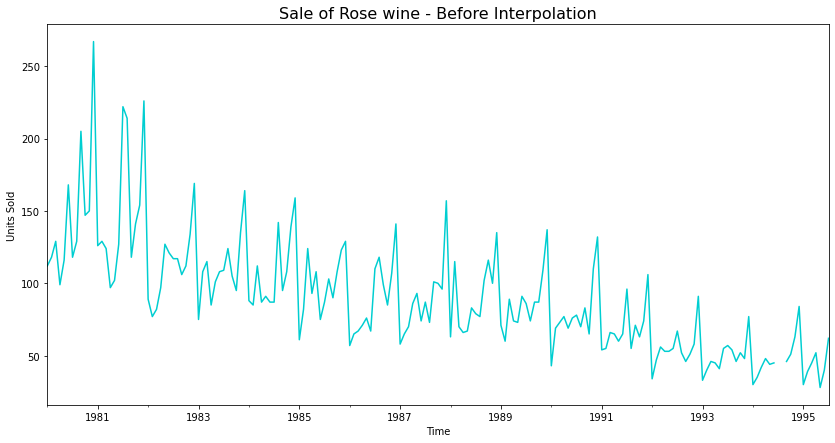

In [9]:
printmd('**Sales Data of Rose Wines:**')
rose.plot(color='darkturquoise')
plt.title('Sale of Rose wine - Before Interpolation', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.show()

## Inferences:

- A decreasing Trend could be observed with a multiplicative seasonality present.
-The Null values could be observed as a break in the plot for the observed timestamps.

## Imputing the Null Values:

#### A polynomial of order 2 imputation is done here.

In [10]:
rose = rose.interpolate(method = 'polynomial', order = 2)
printmd('**The new interpolated values of the previously missing values:**')
rose[rose.index.isin(nan_list) == True]

**The new interpolated values of the previously missing values:**

YearMonth
1994-07-01    45.364189
1994-08-01    44.279246
Name: Rose, dtype: float64

## Inferences:

- The missing values are imputed using polynomial interpolation of order 2. The new values for the index '1994-07-01' is 45.36 and for index '1994-08-01' is 44.28 approximately.

### Note: Although the sales numbers should be whole numbers but here we are getting float values due to interpolation. The values are kept as it is and not rounded off.

**Sales Data of Rose Wines after missing value treatment:**

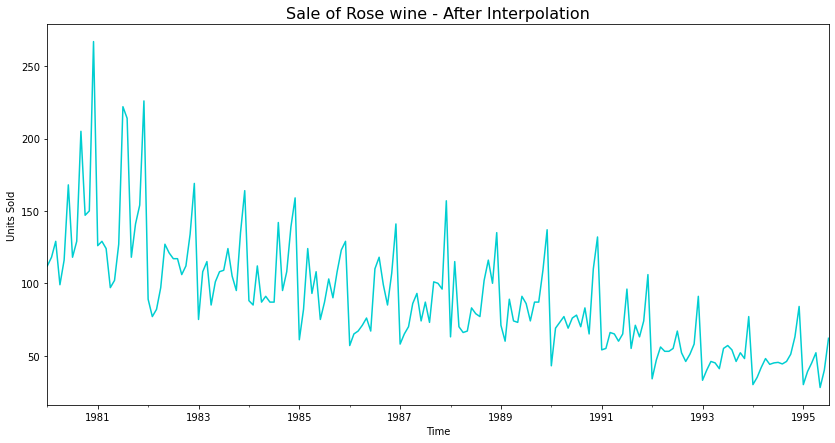

In [11]:
printmd('**Sales Data of Rose Wines after missing value treatment:**')
rose.plot(color='darkturquoise')
plt.title('Sale of Rose wine - After Interpolation', fontsize =16)
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.show()

## Inferences:

- The plot now could be observed with no missing values.

# 1.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

## Check the basic measures of descriptive statistics:

In [12]:
printmd('**Data Description for Rose Dataset:**')
rose.describe()

**Data Description for Rose Dataset:**

count    187.000000
mean      89.907184
std       39.246679
min       28.000000
25%       62.500000
50%       85.000000
75%      111.000000
max      267.000000
Name: Rose, dtype: float64

## Inferences:

- The mean value of the Time Series is nearly same as the median values. As a time series data it may signify presence of decreasing trend and multiplicative seasonality.
- The basic measures of descriptive statistics tell us how the Sales have varied across years. But for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Plot a boxplot to understand the spread of sales across different years and within different months across years.

### Yearly Boxplot -Rose

**Yearly Boxplot for Rose Dataset:**

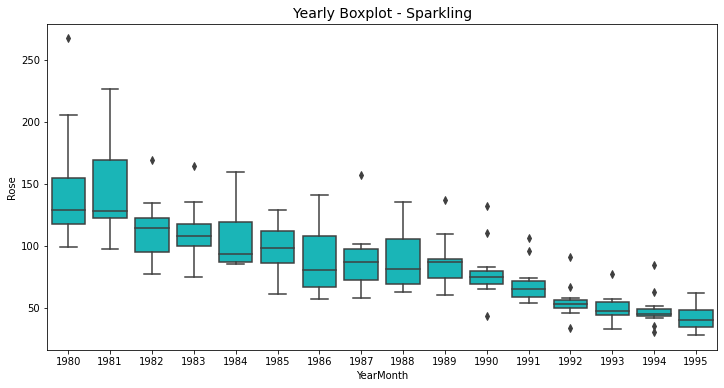

In [13]:
printmd('**Yearly Boxplot for Rose Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = rose.index.year,y = rose, color = 'darkturquoise')
plt.title('Yearly Boxplot - Sparkling', fontsize=14)
plt.show()

## Inferences:

- It shows that there is a yearly decreasing Trend present.

## Monthly Plot - Rose

**Monthly Boxplot for all the years for Rose Dataset:**

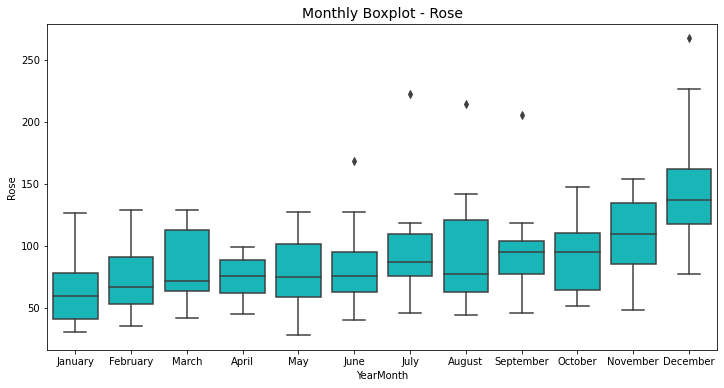

In [14]:
printmd('**Monthly Boxplot for all the years for Rose Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = rose.index.month_name(),y = rose, color='darkturquoise')
plt.title('Monthly Boxplot - Rose', fontsize=14)
plt.show()

## Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

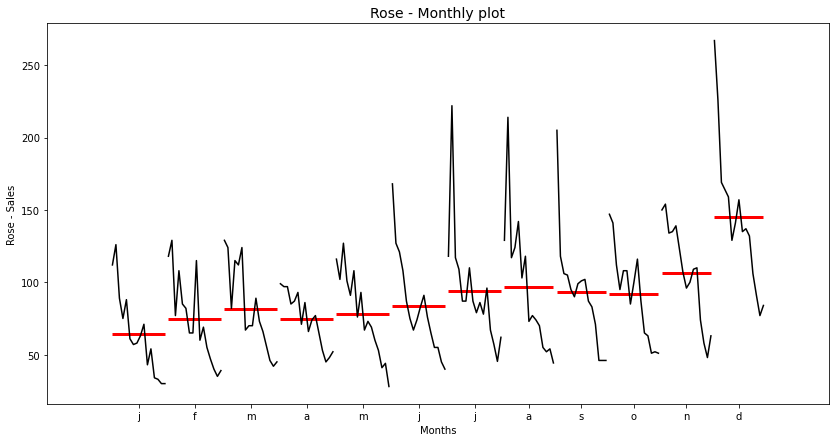

In [15]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(rose,ylabel='Rose - Sales')
plt.xlabel('Months')
plt.title('Rose - Monthly plot', fontsize = 14)
plt.show()

#### This plot shows us the behaviour of the Time Series across various months. The red line is the median value.

## Inferences:

- The monthly plot shows that certain months have higher values than others indicating presence of seasonality.

## Plot graph of monthly Wine sales across years:

In [16]:
monthly_sales_across_years_rose = pd.pivot_table(pd.DataFrame(rose), columns = rose.index.month, 
                                                      index = rose.index.year)
monthly_sales_across_years_rose

Rose                                                            \
YearMonth     1      2      3     4      5      6           7           8    
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.364189   44.279246   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

                                       
YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

**Monthly Wine sales across years for Rose:**

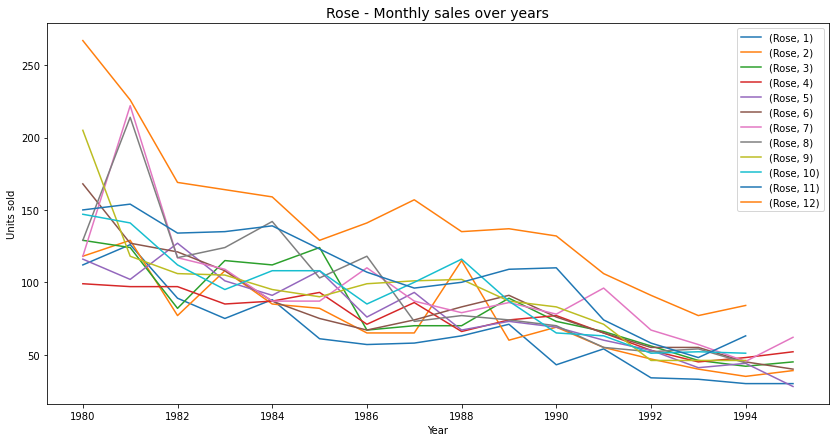

In [17]:
printmd('**Monthly Wine sales across years for Rose:**')
monthly_sales_across_years_rose.plot()
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Rose - Monthly sales over years', fontsize=14)
plt.show()

## Inferences:

- A decreasing Trend could be observed for the different months along the Years.
- Certain months have comparitively higher values throughout the years.

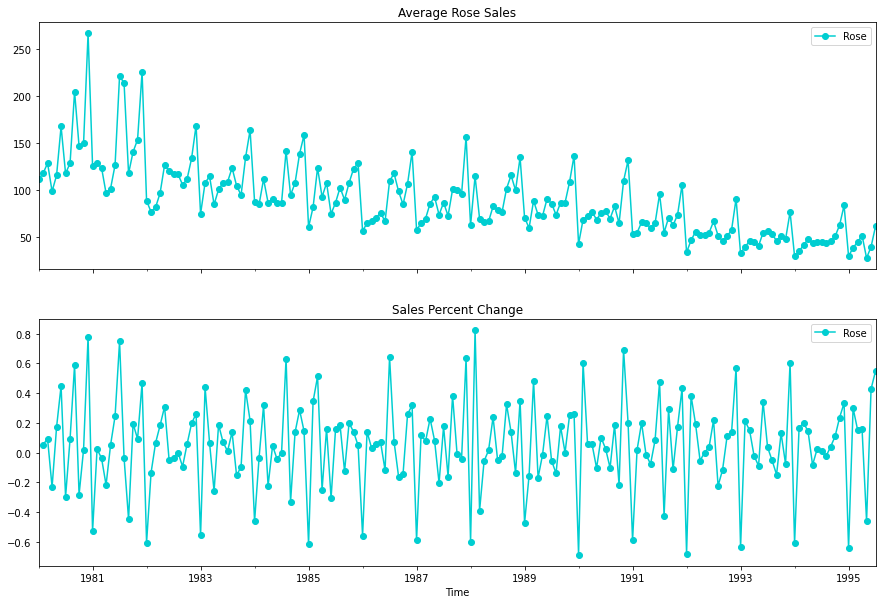

In [18]:
# group by date and get average Rose sales and precent change
average_rose    = rose.groupby(rose.index).mean()
pct_change_rose = rose.groupby(rose.index).sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,10))
# plot average Rose sales over time(year-month)
ax1 = average_rose.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales", color = 'darkturquoise')
# plot precent change for Sales over time(year-month)
ax2 = pct_change_rose.plot(legend=True,ax=axis2,marker='o',color='darkturquoise',title="Sales Percent Change")
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()

## Inferences:

- There certain higher percentage changes between months present periodically suggesting presence of Seasonality.

## Decompose the Time Series and plot the different components.

#### By observing the plot above we have seen presence of multiplicative seasonality and thus decompose the rose time series accordingly.

In [19]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

**Decomposition of Rose Time Series with multiplicative Seasonality:**

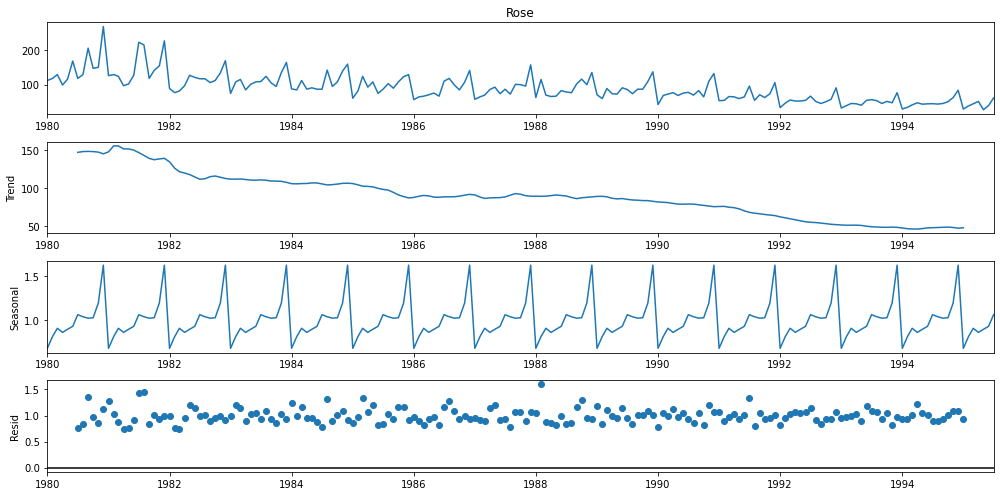

In [20]:
printmd('**Decomposition of Rose Time Series with multiplicative Seasonality:**')
decomposition_mul = seasonal_decompose(rose,model='multiplicative')
decomposition_mul.plot();

## Inferences:

- The time series is decomposed and a decreasing trend is observed. Also the residuals look random and in general not with high deviations.

# 1.3 Split the data into training and test. The test data should start in 1991

In [21]:
rose = pd.DataFrame(rose)
train_rose = rose[rose.index.year < 1991]
test_rose = rose[rose.index.year >= 1991]

In [22]:
print('Length of Train Data:', len(train_rose))
print('Length of Test Data:', len(test_rose))

Length of Train Data: 132
Length of Test Data: 55


In [23]:
print('First few rows of Training Data:','\n',train_rose.head(),'\n')
print('Last few rows of Training Data:','\n',train_rose.tail(),'\n')
print('First few rows of Test Data:','\n',test_rose.head(),'\n')
print('Last few rows of Test Data:','\n',test_rose.tail(),'\n')

First few rows of Training Data: 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data: 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Test Data: 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data: 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



In [24]:
print(train_rose.shape)
print(test_rose.shape)

(132, 1)
(55, 1)


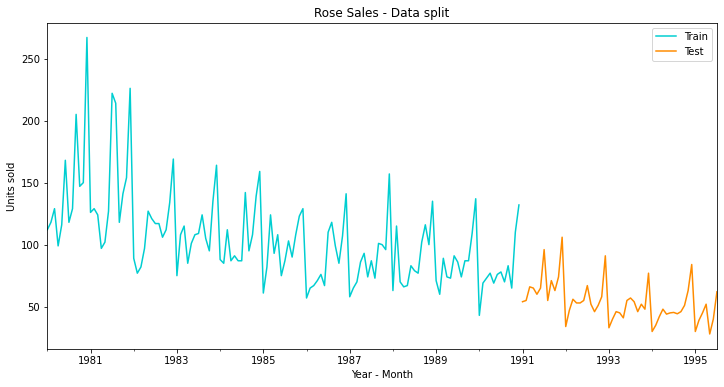

In [25]:
plt.figure(figsize = (12, 6))
train_rose['Rose'].plot(label = 'Train',color='darkturquoise')
test_rose['Rose'].plot(label = 'Test',color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

## Inferences :

- The train test split is done with the test data staring from the year 1991.
- There 132 values in the Train set and 55 values in the test set.
- The starting and ending values are also observed for the train and test set.
- A plot showing the train and test together is also observed.

# 1.4 Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression, naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

#### Note:Please do try to build as many models as possible and as many iterations of models as possible with different parameters.

## Model 1: Linear Regression

In [26]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+133 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


#### We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [27]:
LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

In [28]:
LinearRegression_train_rose['time'] = train_time
LinearRegression_test_rose['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train_rose.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_rose.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_rose.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_rose.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



#### Now that our training and test data has been modified, let us go ahead use LINEAR REGRESSION to build the model on the training data and test the model on the test data.

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train_rose[['time']],LinearRegression_train_rose['Rose'].values)

LinearRegression()

In [30]:
LinearRegression_train_rose['RegOnTime_rose'] = lr.predict(LinearRegression_train_rose[['time']])
LinearRegression_test_rose['RegOnTime_rose'] = lr.predict(LinearRegression_test_rose[['time']])

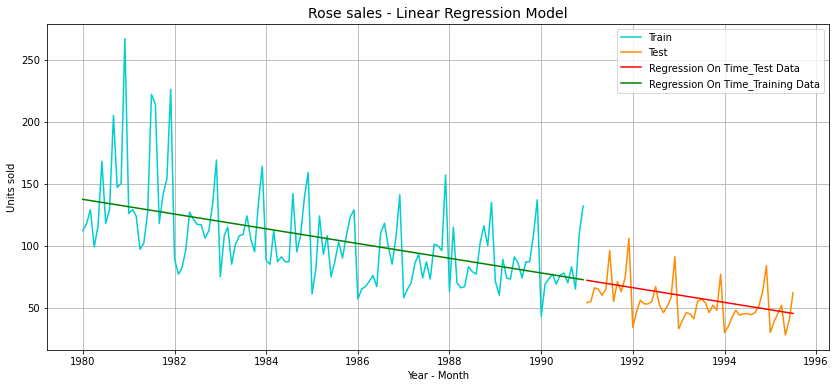

In [31]:
plt.figure(figsize=(14,6))
plt.plot( train_rose['Rose'], label='Train',color = 'darkturquoise')
plt.plot(test_rose['Rose'], label='Test',color = 'darkorange')
plt.plot(LinearRegression_test_rose['RegOnTime_rose'], label='Regression On Time_Test Data',color = 'red')
plt.plot(LinearRegression_train_rose['RegOnTime_rose'], label='Regression On Time_Training Data',color = 'green')
plt.title('Rose sales - Linear Regression Model', fontsize = 14)
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.grid();

## Model Evaluation

In [32]:
rmse_reg = np.sqrt(metrics.mean_squared_error(test_rose['Rose'],LinearRegression_test_rose['RegOnTime_rose']))
print("For Regression On Time forecast on the Test Data, RMSE is %3.3f " %(rmse_reg))

For Regression On Time forecast on the Test Data, RMSE is 15.278 


In [33]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_reg]},index=['RegressionOnTime'])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369


## Inferences:

- The Linear Regression model is trained using the Train data and then the test values are predicted. The RMSE on the Test data is observed to be 15.28 approximately.

## Model 2: Naive forecast

In [34]:
NaiveModel_train = train_rose.copy()
NaiveModel_test = test_rose.copy()

In [35]:
NaiveModel_train['rose_naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_train['rose_naive'].head()

YearMonth
1980-01-01    132.0
1980-02-01    132.0
1980-03-01    132.0
1980-04-01    132.0
1980-05-01    132.0
Name: rose_naive, dtype: float64

In [36]:
NaiveModel_test['rose_naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_test['rose_naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: rose_naive, dtype: float64

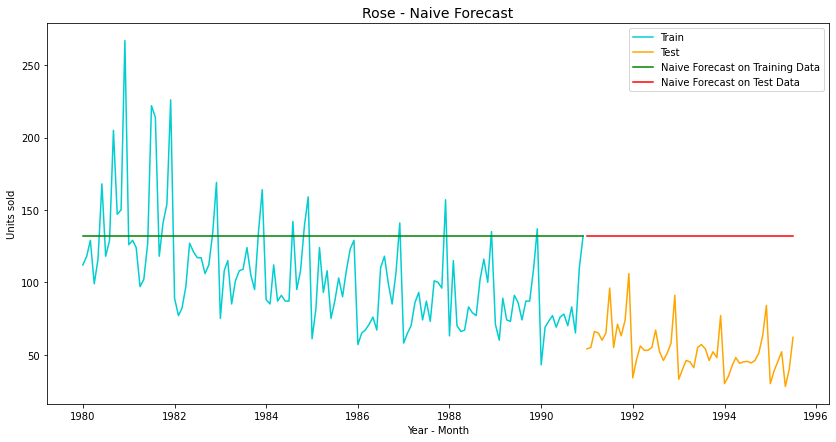

In [37]:
plt.plot(NaiveModel_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(test_rose['Rose'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'green')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14)
plt.show();

## Model Evauation

In [38]:
rmse_naive = metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test['rose_naive'],squared=False)
print("For Naive forecast on the Test Data, RMSE is %3.3f " %(rmse_naive))

For Naive forecast on the Test Data, RMSE is 79.746 


In [39]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['NaiveModel'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697


## Model 3: Simple Average

In [40]:
SimpleAverage_train = train_rose.copy()
SimpleAverage_test = test_rose.copy()

In [41]:
SimpleAverage_train['rose_mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_train['rose_mean_forecast'].head()

YearMonth
1980-01-01    104.939394
1980-02-01    104.939394
1980-03-01    104.939394
1980-04-01    104.939394
1980-05-01    104.939394
Name: rose_mean_forecast, dtype: float64

In [42]:
SimpleAverage_test['rose_mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

YearMonth
1991-01-01    104.939394
1991-02-01    104.939394
1991-03-01    104.939394
1991-04-01    104.939394
1991-05-01    104.939394
Name: rose_mean_forecast, dtype: float64

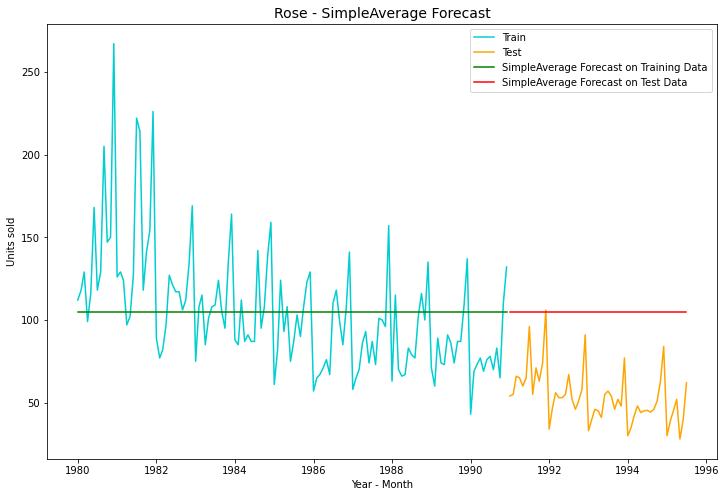

In [43]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(test_rose['Rose'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'green')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - SimpleAverage Forecast", fontsize=14)
plt.show()

## Model Evaluation

In [44]:
rmse_simple_avg = metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data, RMSE is %3.3f " %(rmse_simple_avg))

For Simple Average forecast on the Test Data, RMSE is 53.488 


In [45]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_simple_avg]},index=['SimpleAverage'])
rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_3])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233


## Model 4: Moving Average

In [46]:
MovingAverage = rose.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [47]:
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Rose_Trailing_2,Rose_Trailing_4,Rose_Trailing_6,Rose_Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


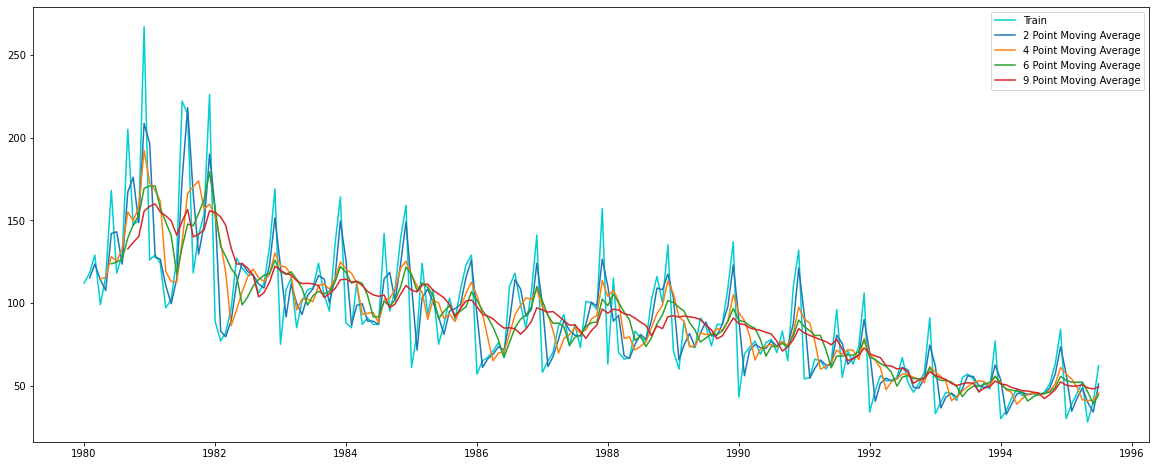

In [48]:
plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Rose'], label='Train', color='darkturquoise')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best');

In [49]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

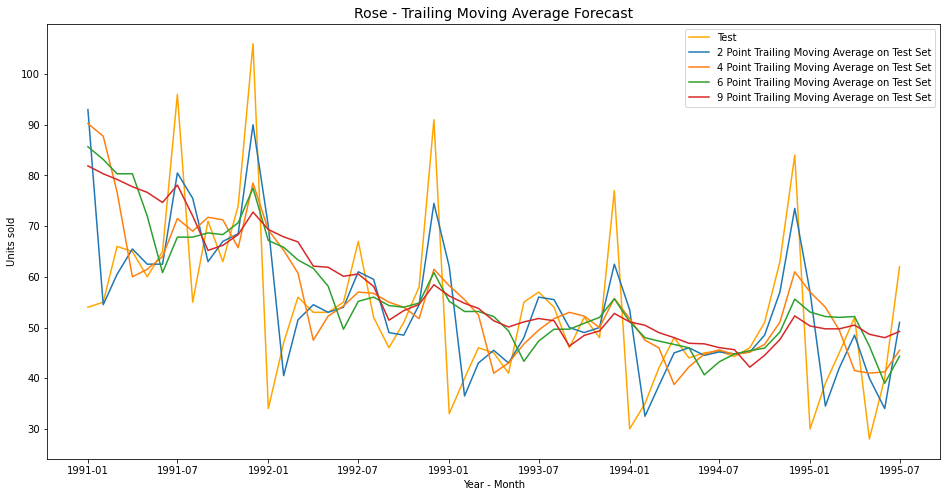

In [50]:
## Plotting on Test data

plt.figure(figsize=(16,8))
# plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'orange')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14);

In [51]:
## Test Data - rmse_rose --> 2 point Rose_Trailing MA

rmse_rose_MovingAverage_2 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  rmse_rose is %3.3f " %(rmse_rose_MovingAverage_2))

## Test Data - rmse_rose --> 4 point Rose_Trailing MA

rmse_rose_MovingAverage_4 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  rmse_rose is %3.3f" %(rmse_rose_MovingAverage_4))

## Test Data - rmse_rose --> 6 point Rose_Trailing MA

rmse_rose_MovingAverage_6 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  rmse_rose is %3.3f" %(rmse_rose_MovingAverage_6))

## Test Data - rmse_rose --> 9 point Rose_Trailing MA

rmse_rose_MovingAverage_9 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  rmse_rose is %3.3f" %(rmse_rose_MovingAverage_9))

For 2 point Moving Average Model forecast on the Test Data,  rmse_rose is 11.530 
For 4 point Moving Average Model forecast on the Test Data,  rmse_rose is 14.458
For 6 point Moving Average Model forecast on the Test Data,  rmse_rose is 14.573
For 9 point Moving Average Model forecast on the Test Data,  rmse_rose is 14.733


In [52]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_MovingAverage_2,rmse_rose_MovingAverage_4
                                          ,rmse_rose_MovingAverage_6,rmse_rose_MovingAverage_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_4])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918


### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

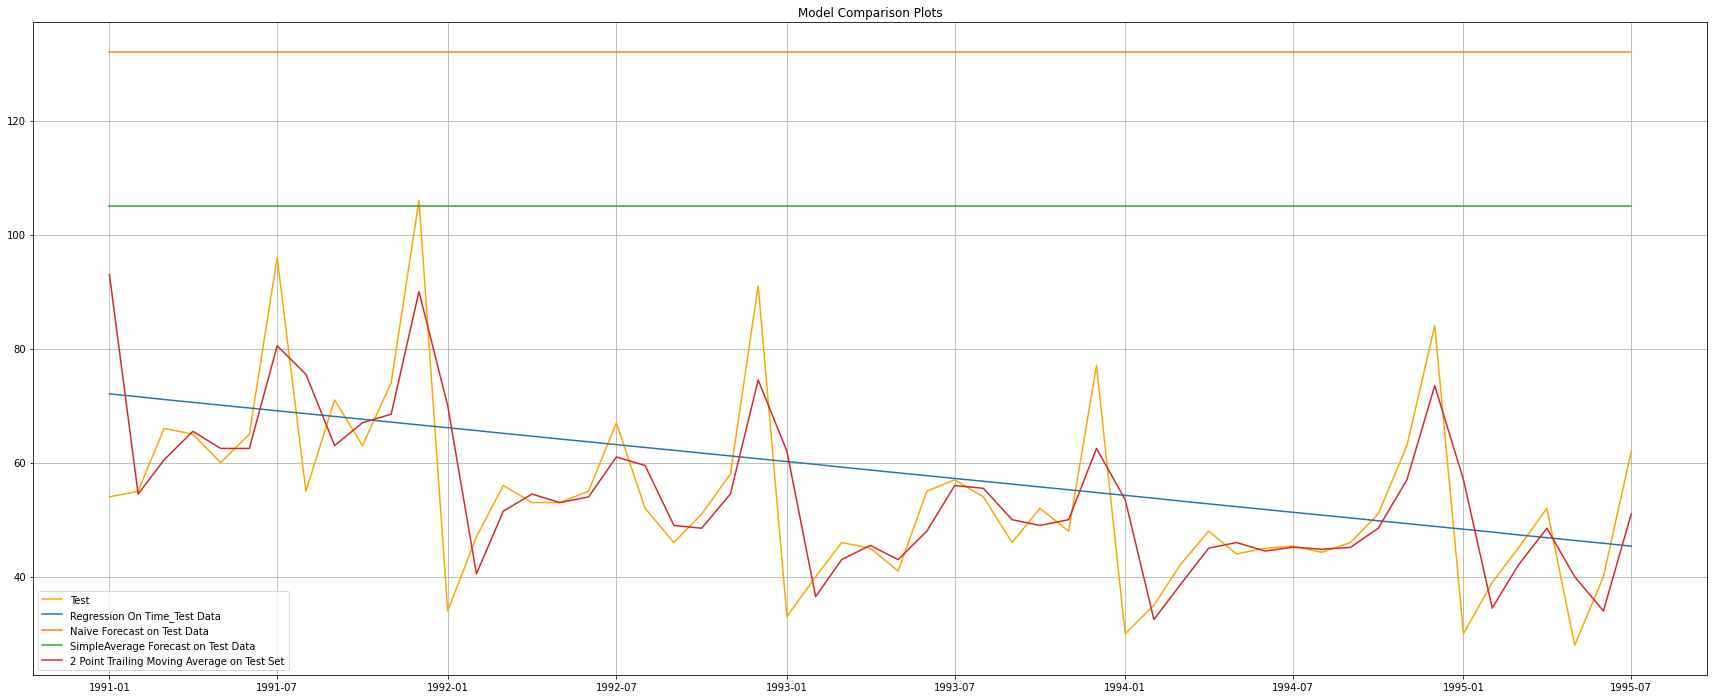

In [53]:
## Plotting on Test data

plt.figure(figsize=(30,12))
# plt.plot(train_rose['Rose'], label='Train',color = 'darkturquoise')
plt.plot(test_rose['Rose'], label='Test',color = 'orange')

plt.plot(LinearRegression_test_rose['RegOnTime_rose'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Model 5: Simple Exponential Smoothing

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [55]:
SES_train = train_rose.copy()
SES_test = test_rose.copy()

In [56]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


## Auto fit Model:

In [57]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [58]:
printmd('**The output parameters for optimized model are:**')
model_SES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [59]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_rose))
printmd('**Viewing the first five Predictions for Test Data:**')
SES_test.head()

**Viewing the first five Predictions for Test Data:**

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104983
1991-02-01,55.0,87.104983
1991-03-01,66.0,87.104983
1991-04-01,65.0,87.104983
1991-05-01,60.0,87.104983


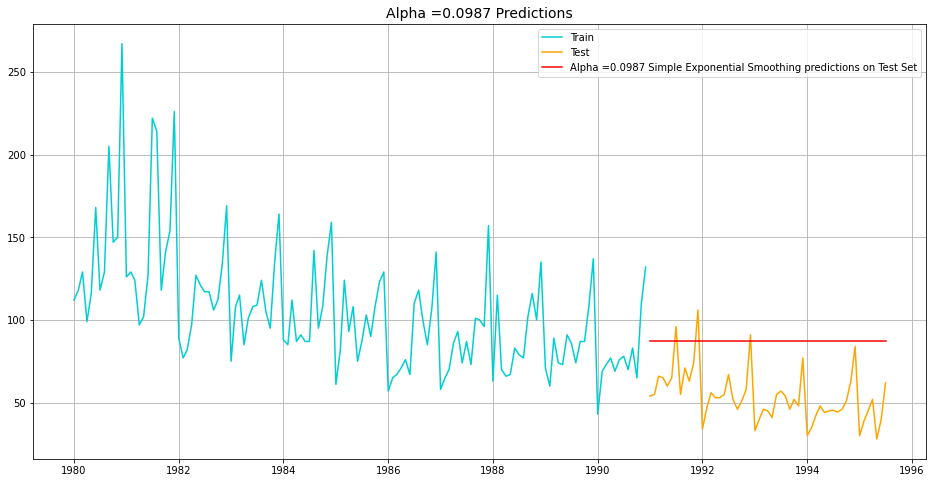

In [60]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train',color = 'darkturquoise')
plt.plot(SES_test['Rose'], label='Test',color = 'orange')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set',color = 'red')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions',fontsize = 14);

### Model Evaluation for Alpha = 0.0987 : SES-Autofit Model:

In [61]:
## Test Data

rmse_SES = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES))

For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.824


In [62]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_SES]}
                           ,index=['Alpha=0.0987, SES Optimized'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464


## Iterative Method for Simple Exponential Smoothing

- Here we will set different alpha values.

In [63]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [64]:
for i in np.arange(0,1.05,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test_rose['Rose']))
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

## Model Evaluation based on Iterations:

In [65]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).head()

,Alpha Values,Train RMSE,Test RMSE
2,0.10,31.815610,36.856268
1,0.05,32.449102,37.039679
3,0.15,31.809845,38.750307
4,0.20,31.979391,41.389972
5,0.25,32.211871,44.388786


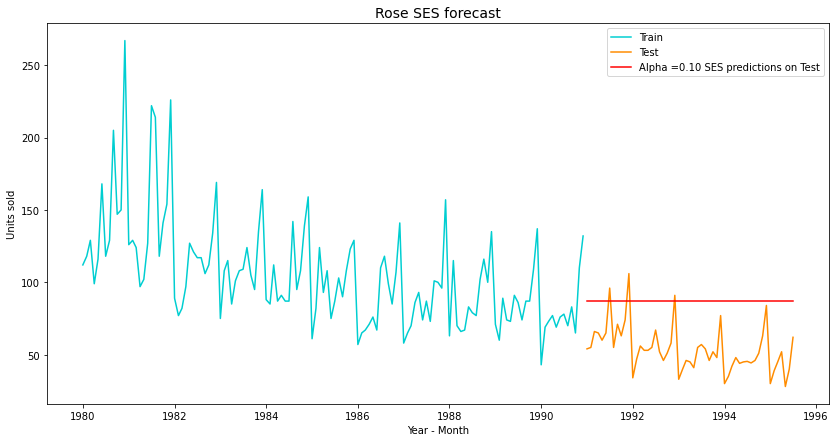

In [66]:
#plt.figure(figsize=(10,5))
plt.plot(SES_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(SES_test['predict', 0.10], color = 'red', label='Alpha =0.10 SES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose SES forecast', fontsize=14)
plt.legend(loc='best');

In [67]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.10,SES_Iterative'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_6_1])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268


## Model 6: Double Exponential Smoothing (Holt's Model)

In [68]:
DES_train = train_rose.copy()
DES_test = test_rose.copy()

In [69]:
model_DES = Holt(DES_train['Rose'])

C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Auto fit Model:

In [70]:
model_DES_autofit = model_DES.fit(optimized=True)

In [71]:
printmd('**The output parameters for optimized model are:**')
model_DES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
print(alpha)
print(beta)

0.017549790270679714
3.236153800377395e-05


In [73]:
DES_test['predict',alpha,beta] = model_DES_autofit.forecast(len(test_rose['Rose']))
printmd('**Viewing the first five Predictions for Test Data:**')
DES_test.head()

**Viewing the first five Predictions for Test Data:**

,Rose,"(predict, 0.017549790270679714, 3.236153800377395e-05)"
YearMonth,,
1991-01-01,54.0,73.259732
1991-02-01,55.0,72.767150
1991-03-01,66.0,72.274569
1991-04-01,65.0,71.781987
1991-05-01,60.0,71.289405


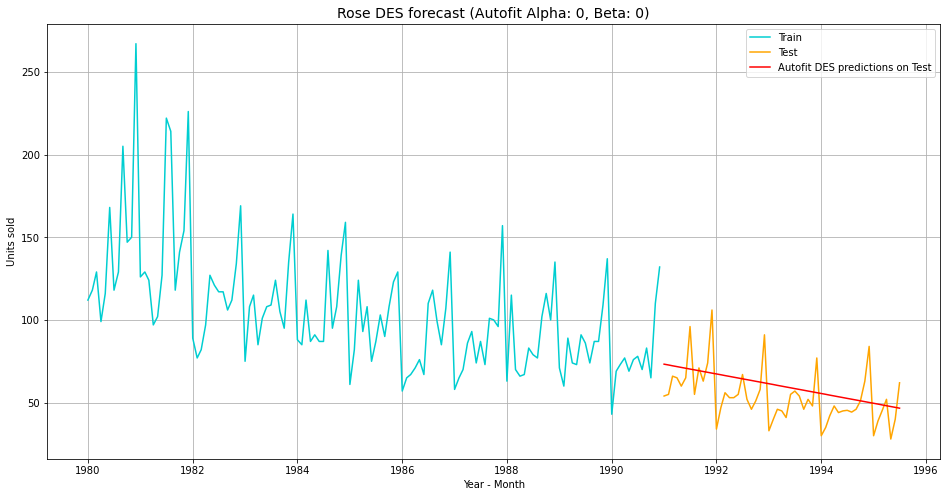

In [74]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train',color = 'darkturquoise')
plt.plot(DES_test['Rose'], label='Test',color = 'orange')

plt.plot(DES_test['predict',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Autofit Alpha: 0, Beta: 0)', fontsize=14)
plt.legend(loc='best')
plt.grid();

### Model Evaluation for Alpha = 0.0 and  Beta = 0.0 : DES-Autofit Model:

In [75]:
## Test Data

rmse_DES = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',alpha,beta],squared=False)
print("For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_DES))

For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.718


In [76]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_DES]}
                           ,index=['Alpha=0.0,Beta=0.0, DES Optimized'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202


## Iterative Method for Double Exponential Smoothing

- Here we will set different alpha values.

In [77]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [78]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test_rose['Rose']))
        
        rmse_DES_train = np.round(metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False),2)
        
        rmse_DES_test = np.round(metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False),2)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

## Model Evaluation based on Iterations:

In [79]:
resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.44,36.95
1,0.1,0.2,33.45,48.72
10,0.2,0.1,33.10,65.76
2,0.1,0.3,33.15,78.19
20,0.3,0.1,33.61,98.69


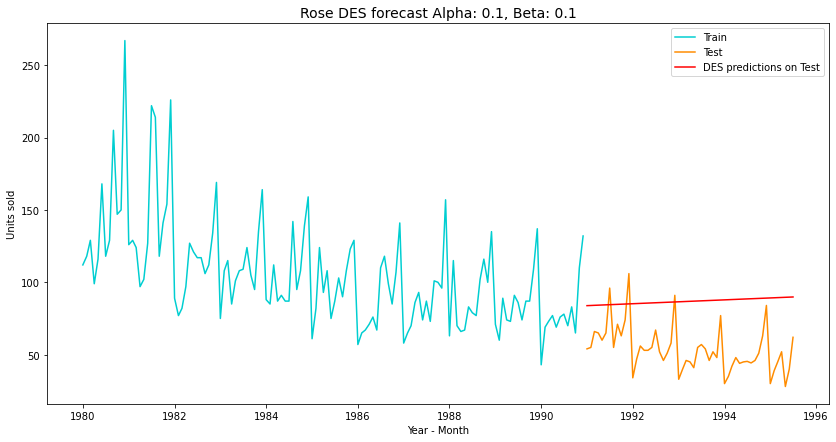

In [80]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(DES_test['predict', 0.1, 0.1], color = 'red', label='DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best');

In [81]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DES_Iterative'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_1])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202


## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [82]:
TES_train = train_rose.copy()
TES_test = test_rose.copy()

In [83]:
model_TES= ExponentialSmoothing(TES_train['Rose'],trend='add',seasonal='multiplicative')

C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Auto fit Model:

In [84]:
model_TES_autofit = model_TES.fit(optimized=True)

In [85]:
printmd('**The output parameters for optimized model are:**')
model_TES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
print(alpha)
print(beta)
print(gamma)

0.06569374607191865
0.05192938504457338
3.879136202038614e-06


In [87]:
## Prediction on the test data
TES_test['predict',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test_rose['Rose']))

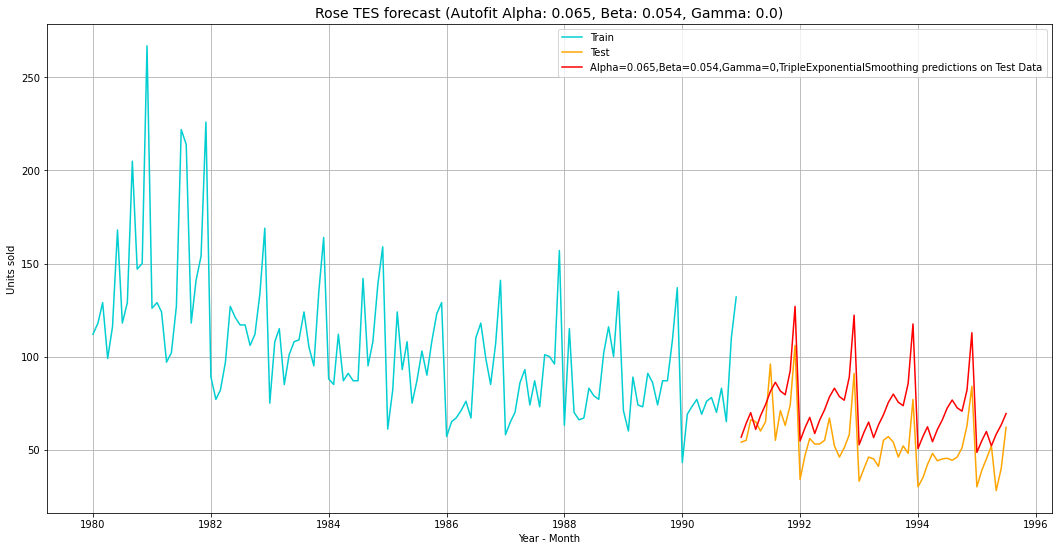

In [88]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train',color = 'darkturquoise')
plt.plot(TES_test['Rose'], label='Test',color = 'orange')

plt.plot(TES_test['predict',alpha,beta,gamma], color='red',label='Alpha=0.065,Beta=0.054,Gamma=0,TripleExponentialSmoothing predictions on Test Data')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Autofit Alpha: 0.065, Beta: 0.054, Gamma: 0.0)', fontsize=14)
plt.legend(loc='best')
plt.grid();

### Model Evaluation for Alpha = 0.065 and  Beta = 0.054 = 0.0 : TES-Autofit Model:

In [89]:
## Test Data

rmse_TES = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',alpha,beta,gamma],squared=False)
print("For Auto-fit Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_TES))

For Auto-fit Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 21.057


In [90]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_TES]}
                           ,index=['Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202


## Iterative Method for Triple Exponential Smoothing

In [91]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [92]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test_rose['Rose']))
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_TES_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                                 , ignore_index=True)

## Model Evaluation based on Iterations:

In [93]:
resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE,Gamma Values
8,0.1,0.2,23.969166,9.943563,0.3
112,0.2,0.5,27.631767,10.011658,0.3
170,0.3,0.2,26.806878,10.388879,0.5
9,0.1,0.2,23.919163,10.392020,0.4
184,0.3,0.4,28.111886,10.952348,0.3


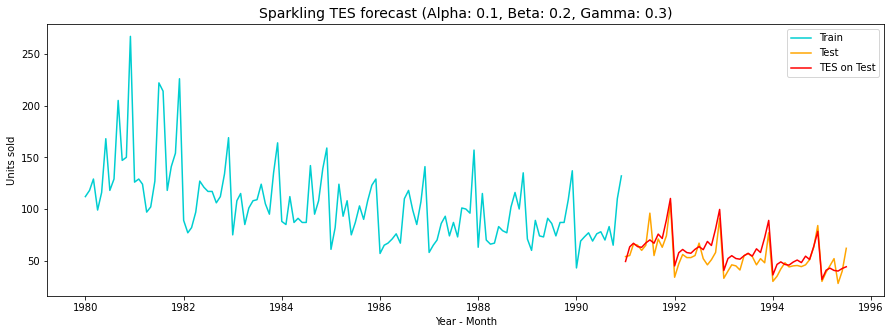

In [94]:
plt.figure(figsize=(15,5))
plt.plot(TES_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Rose'], label='Test', color = 'orange')

plt.plot(TES_test['predict', 0.1, 0.2, 0.3], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.3)', fontsize=14)

plt.legend(loc='best');

In [95]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_1])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202


In [96]:
rose_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative",9.943563
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
RegressionOnTime,15.278369
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202
"Alpha=0.065,Beta=0.054,gamma=0.0 TES Optimized",21.056902
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268


## Plot all above models

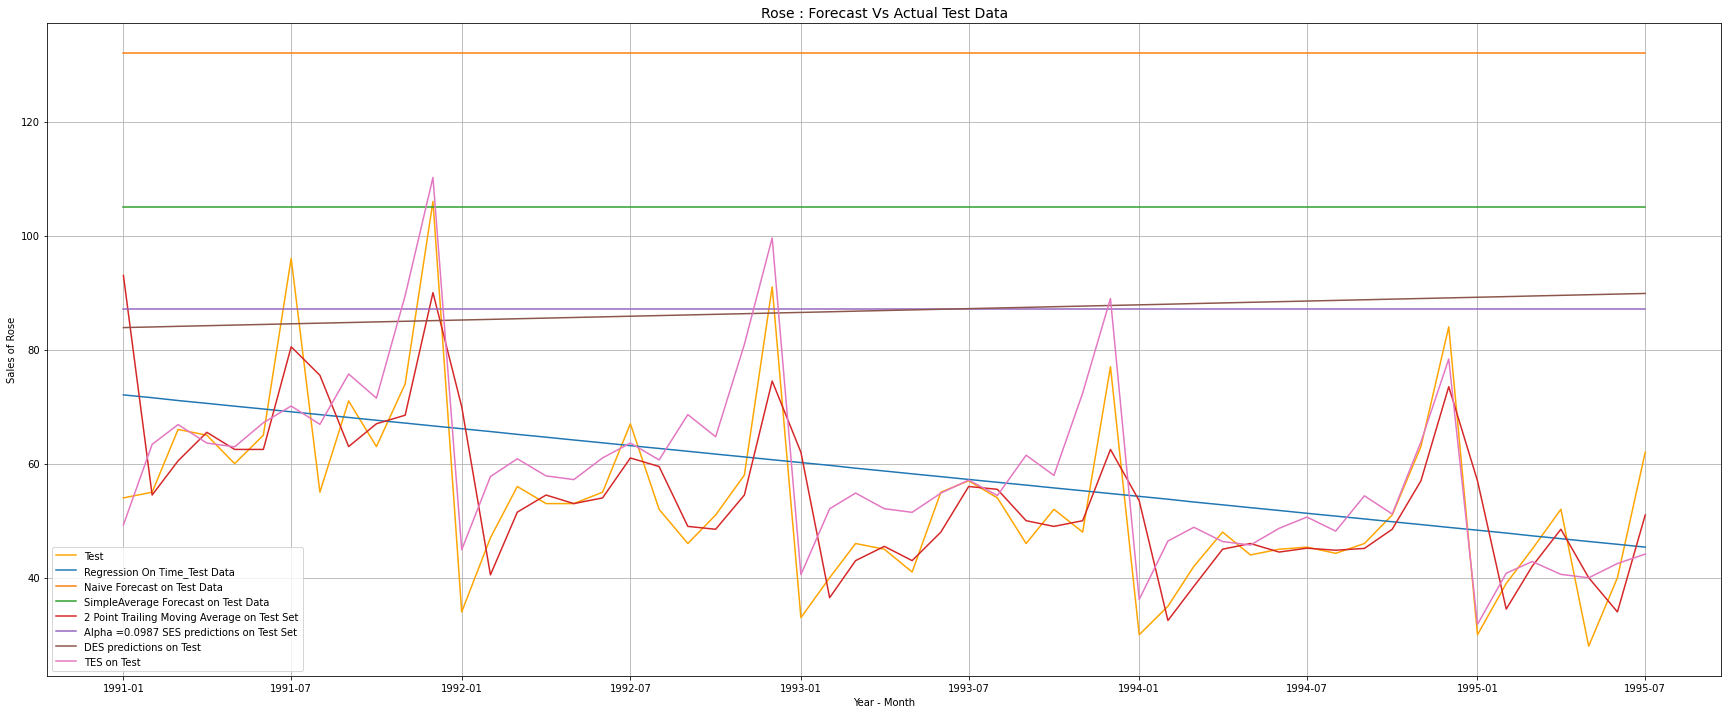

In [97]:
## Plotting on Test data

plt.figure(figsize=(30,12))
#Train data
# plt.plot(train_rose['Rose'], label='Train',color = 'darkturquoise')
#Test data
plt.plot(test_rose['Rose'], label='Test',color = 'orange')
#Linear Regression
plt.plot(LinearRegression_test_rose['RegOnTime_rose'], label='Regression On Time_Test Data')
#Naive Forecast
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data')
#SimpleAverage
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data')
#2-point Trailing Moving Average
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
##SES Optimised at alpha=0.0987
plt.plot(SES_test['predict'], label='Alpha =0.0987 SES predictions on Test Set')
#DES iterative at alpha=0.1 and beta=0.1
plt.plot(DES_test['predict', 0.1, 0.1], label='DES predictions on Test')
#TES iterative at alpha=0.1, beta=0.2 and gamma=0.3
plt.plot(TES_test['predict', 0.1, 0.2, 0.3], label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')
plt.title('Rose : Forecast Vs Actual Test Data', fontsize=14)
plt.grid()
plt.legend(loc='best');

# 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

## Check for stationarity of the whole Time Series data.

In [98]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

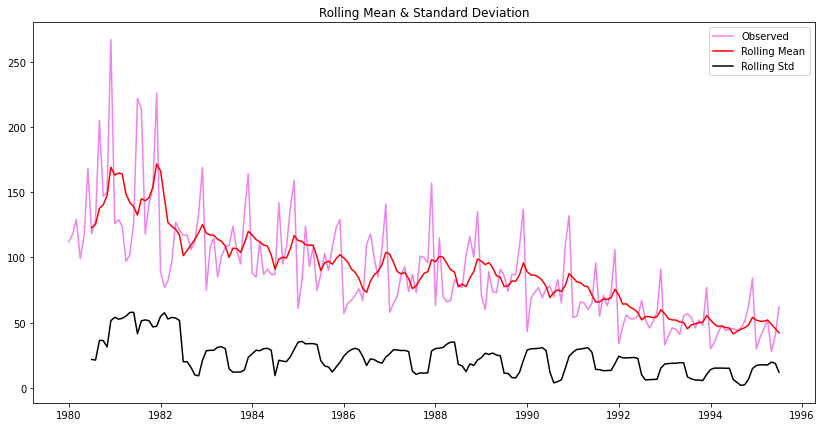

Results of Dickey-Fuller Test:
Test Statistic                  -1.872615
p-value                          0.345051
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [99]:
#Original Time Series
test_stationarity(rose['Rose'], 'violet')

## Inferences:

- We see that at 5% significant level the Time Series is non-stationary.
- Let us take a difference of order 1 and check whether the Time Series is stationary or not.
- Difference of original series
- Seasonality is multiplicative as the Std deviation and mean varies according to the change in trend

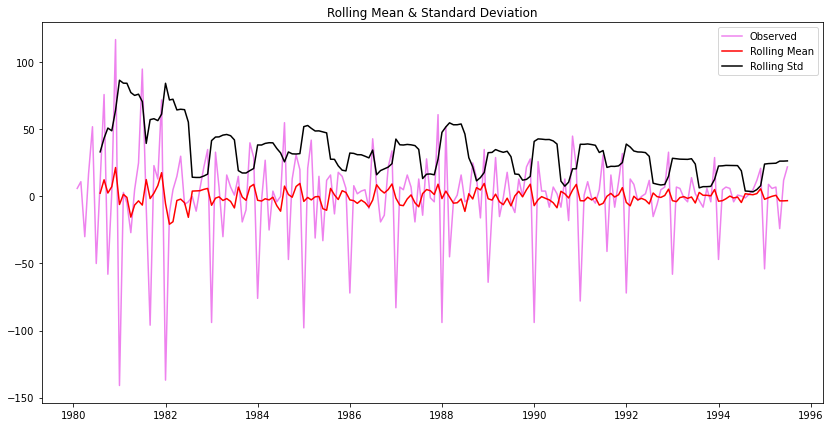

Results of Dickey-Fuller Test:
Test Statistic                -8.044081e+00
p-value                        1.814191e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [100]:
test_stationarity(rose['Rose'].diff().dropna(), 'violet')

### We see that at Alpha = 0.05 the Time Series is indeed stationary. d=1

If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA/SARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there.Also we can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

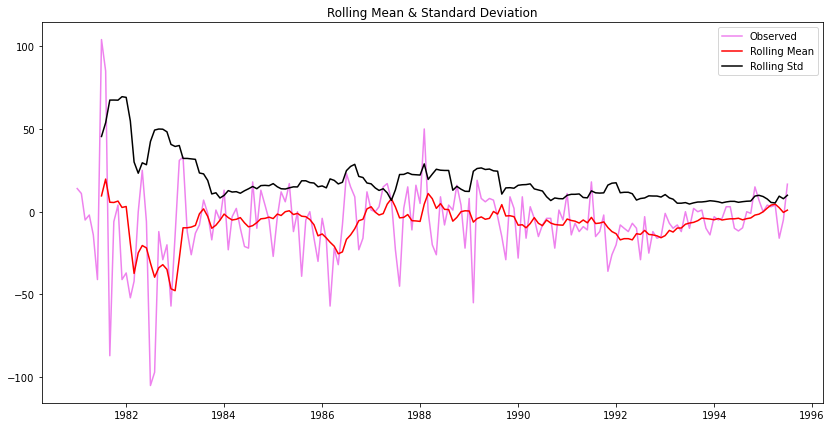

Results of Dickey-Fuller Test:
Test Statistic                  -4.257265
p-value                          0.000526
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [101]:
#check Seasonality Time Series: 
test_stationarity(rose['Rose'].diff(12).dropna(), 'violet')

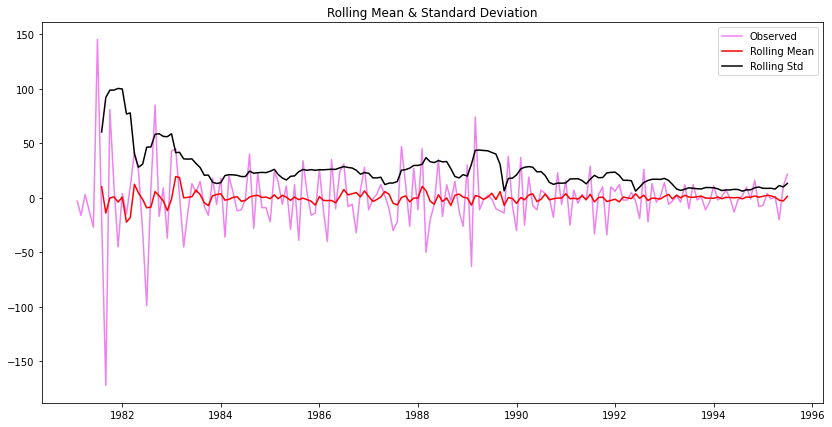

Results of Dickey-Fuller Test:
Test Statistic                  -4.605791
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [102]:
test_stationarity((rose['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

#### We see that at Alpha = 0.05 the Time Series is indeed stationary. But seasonality is multiplicative

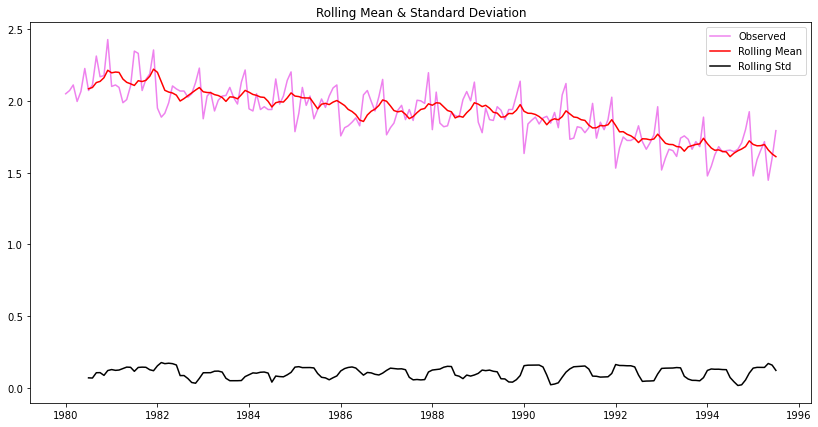

Results of Dickey-Fuller Test:
Test Statistic                  -0.412363
p-value                          0.908014
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [103]:
#Take Log series
test_stationarity(np.log10(rose['Rose']), 'violet')

#### Seasonality is now additive but non stationary

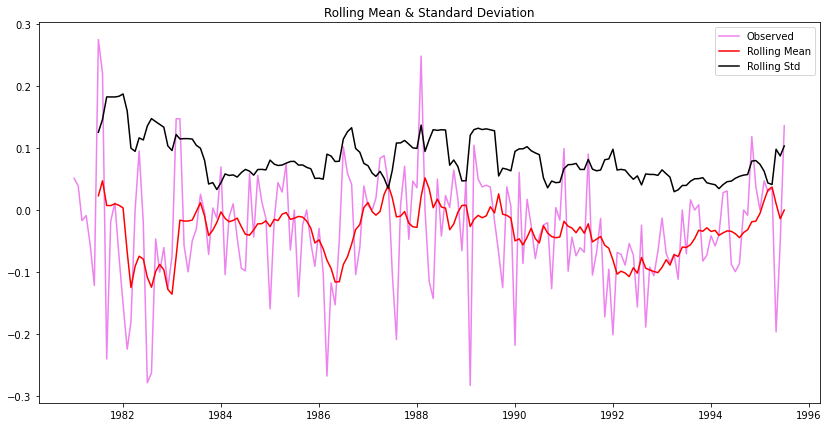

Results of Dickey-Fuller Test:
Test Statistic                  -3.934772
p-value                          0.001793
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [104]:
test_stationarity(np.log10(rose['Rose']).diff(12).dropna(), 'violet')

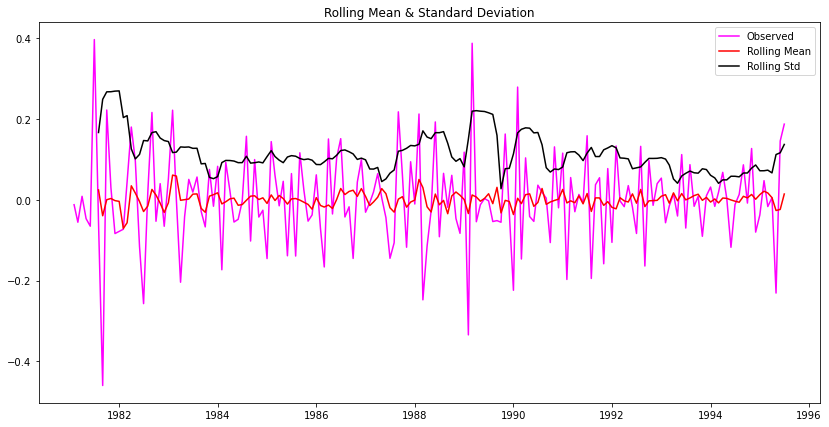

Results of Dickey-Fuller Test:
Test Statistic                  -4.628179
p-value                          0.000115
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [105]:
test_stationarity((np.log10(rose['Rose']).diff(12).dropna()).diff().dropna(),  'magenta')

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### ACF Plots

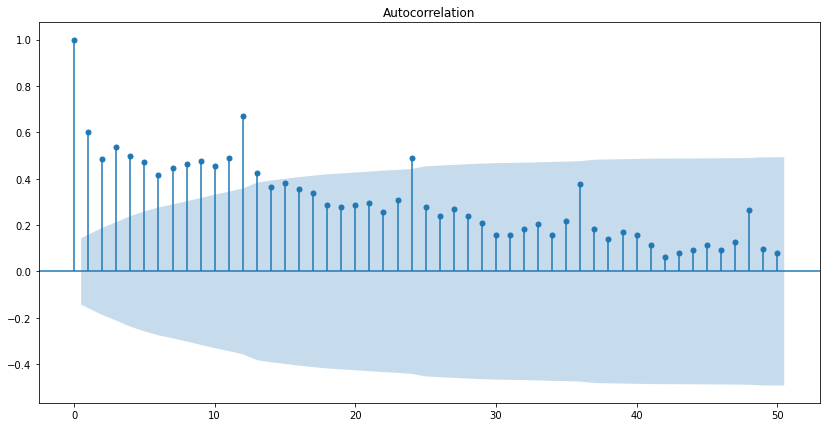

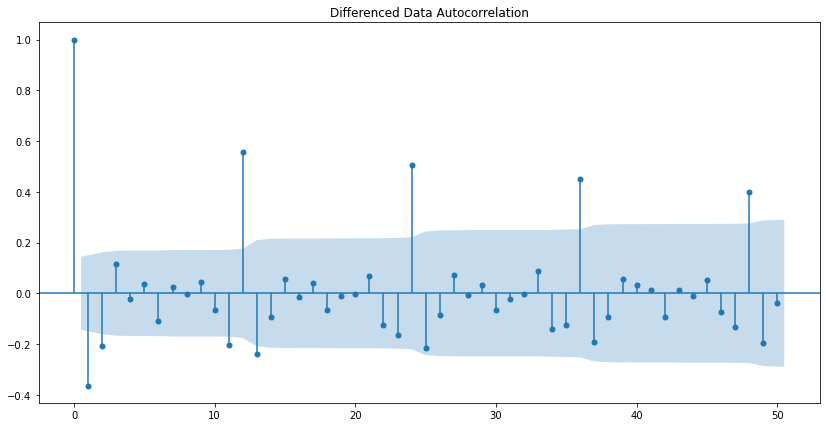

In [107]:
plot_acf(rose['Rose'],lags=50)
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

### PACF Plots

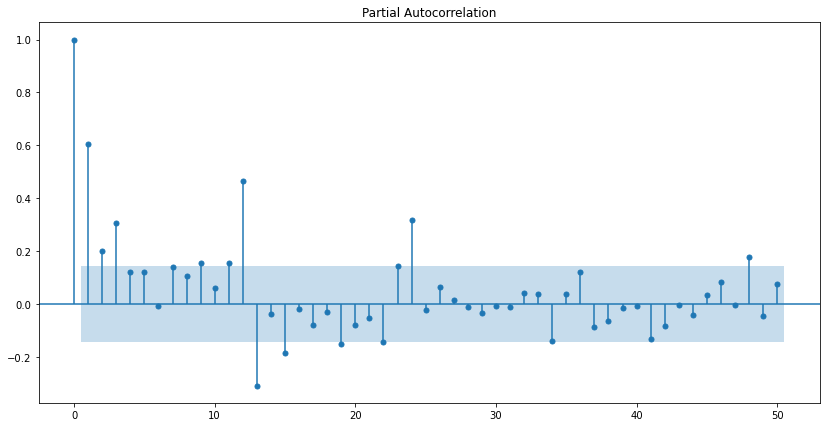

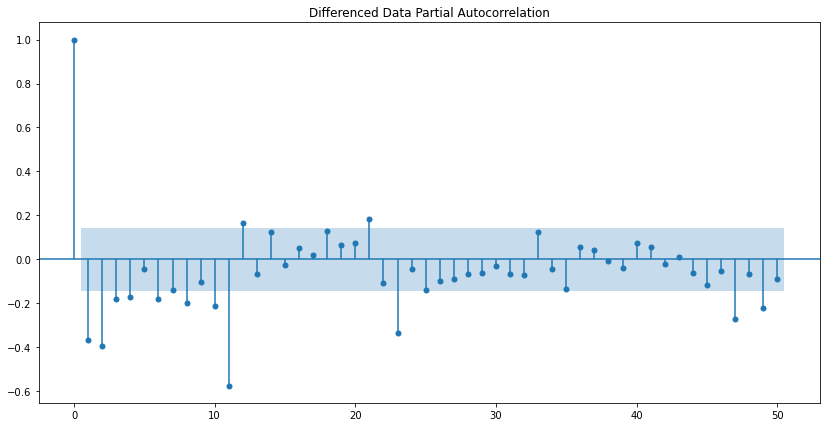

In [108]:
plot_pacf(rose['Rose'],lags=50)
plot_pacf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### From the above plots, we can say that there seems to be a seasonality in the data.

## Check for stationarity of the Training Data Time Series.

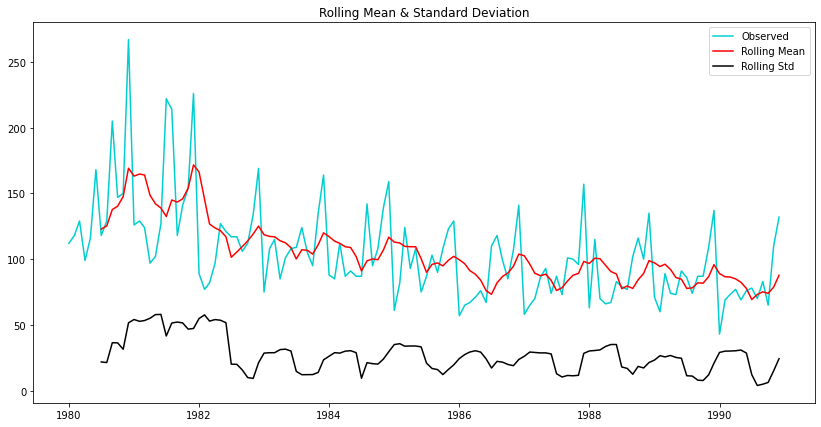

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [109]:
test_stationarity(train_rose['Rose'],'darkturquoise')

## Inferences:

- We see that at 5% significant level the Time Series is non-stationary.
- Let us take a difference of order 1 and check whether the Time Series is stationary or not.

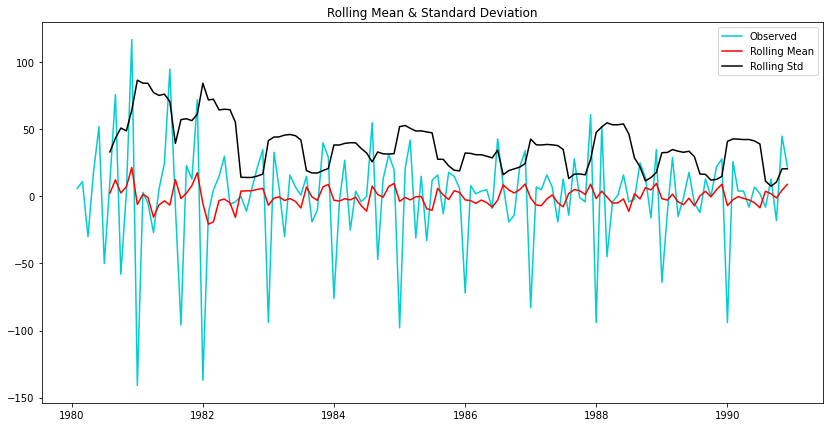

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [110]:
test_stationarity(train_rose['Rose'].diff().dropna(),'darkturquoise')

#### We see that at Alpha = 0.05 the Time Series is indeed stationary. 

# 1.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Model 8: Auto-ARIMA

In [111]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [112]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [113]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046448
ARIMA(0, 1, 2) - AIC:1276.8353734911866
ARIMA(1, 1, 0) - AIC:1319.3483105802602
ARIMA(1, 1, 1) - AIC:1277.775753553521
ARIMA(1, 1, 2) - AIC:1277.3592281129256
ARIMA(2, 1, 0) - AIC:1300.6092611744193
ARIMA(2, 1, 1) - AIC:1279.0456894093354
ARIMA(2, 1, 2) - AIC:1279.2986939365205


In [114]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835373
5,"(1, 1, 2)",1277.359228
4,"(1, 1, 1)",1277.775754
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [115]:
#(0, 1, 2) AIC=1276.835382
auto_ARIMA = ARIMA(train_rose['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sat, 16 Jul 2022   AIC                           1276.835
Time:                        09:37:14   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4886      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

## Predict on the Test Set using this model and evaluate the model.

In [116]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_rose['Rose']))

In [117]:
rmse_arima_auto_model = metrics.mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA[0],squared=False)
print("For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is %3.3f" %(rmse_arima_auto_model))

For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is 15.627


In [118]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_arima_auto_model]}
                           ,index=['Auto_ARIMA(0, 1, 2)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_9])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202


### Model 9A: Auto-SARIMA

In [119]:
SARIMA_train = train_rose.copy()
SARIMA_test = test_rose.copy()

#### From ACF and PACF plots We can see that there is a seasonality of 12. We will run our auto SARIMA models by setting seasonality 12.

In [120]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [121]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

,param,seasonal,AIC


In [122]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301644053
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014775927
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601636
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.733218265492
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374416
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729144091
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.628224422131
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133563728
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.073060671733
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:790.9032809266855
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:944.2456655532176
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:929.3362488520044
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:792.7161670349237
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:810.3194350158662
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:804.1555755139157
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:782.1538715246272
SARIMA(0, 1

In [123]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 1, 2, 12)",774.969122
53,"(1, 1, 2)","(2, 1, 2, 12)",776.940108
80,"(2, 1, 2)","(2, 1, 2, 12)",776.996101
17,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
79,"(2, 1, 2)","(2, 1, 1, 12)",783.703652


In [124]:
#(0, 1, 2)*(2, 1, 2, 12) AIC=774.969120
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sat, 16 Jul 2022   AIC                            774.969
Time:                                    09:38:12   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.170      0.000      -1.313      -0.591
ma.L2         -0.0764      0.126   

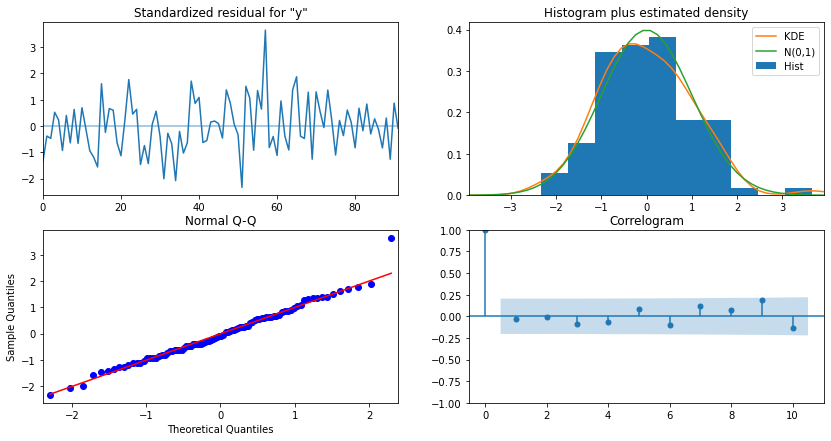

In [125]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model

In [126]:
predicted_auto_SARIMA = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']))

In [127]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.214702,14.221817,16.340454,72.088950
1,62.327974,14.300768,34.298984,90.356963
2,67.315152,14.302710,39.282355,95.347948
3,63.162471,14.305653,35.123907,91.201036
4,66.476733,14.311066,38.427560,94.525906


In [128]:
# Extract the predicted and true values of our time series
rose_forecasted = predicted_auto_SARIMA.predicted_mean
SARIMA_test['rose_forecasted'] = predicted_auto_SARIMA.predicted_mean
SARIMA_test.head()

,Rose,rose_forecasted
YearMonth,,
1991-01-01,54.0,44.214702
1991-02-01,55.0,62.327974
1991-03-01,66.0,67.315152
1991-04-01,65.0,63.162471
1991-05-01,60.0,66.476733


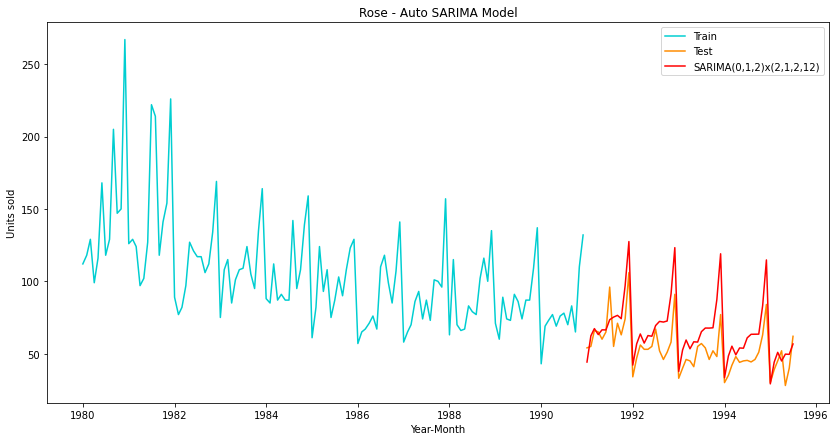

In [129]:
plt.plot(SARIMA_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(SARIMA_test['Rose'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['rose_forecasted'], color='red', label='SARIMA(0,1,2)x(2,1,2,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA Model')
plt.legend(loc='best');

In [130]:
rmse_SARIMA_auto_model = metrics.mean_squared_error(SARIMA_test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print("For Auto-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_auto_model))

For Auto-SARIMA Model forecast on the Test Data, RMSE is 16.529


In [131]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model]}
                           ,index=['Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_10])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202


## Model-9B AUTO SARIMA on Log Series

In [132]:
rose_log_train = np.log10(SARIMA_train['Rose'])

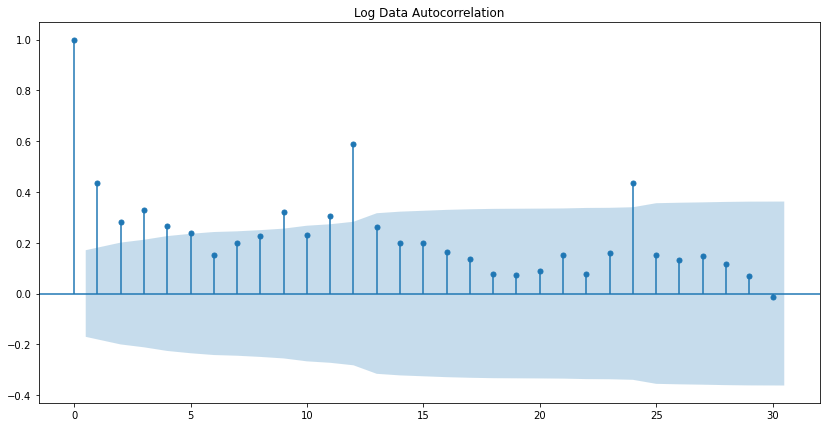

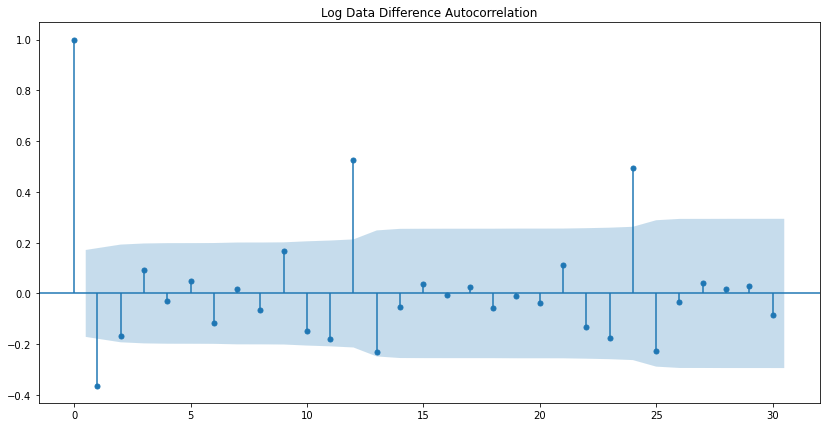

In [133]:
plot_acf(rose_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(rose_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

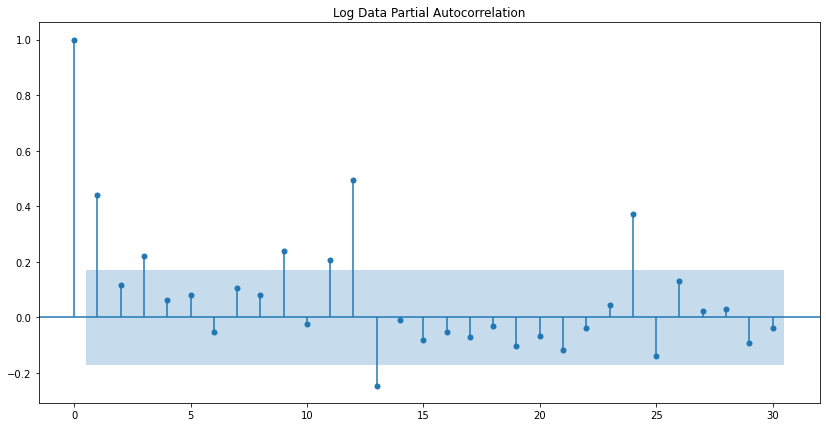

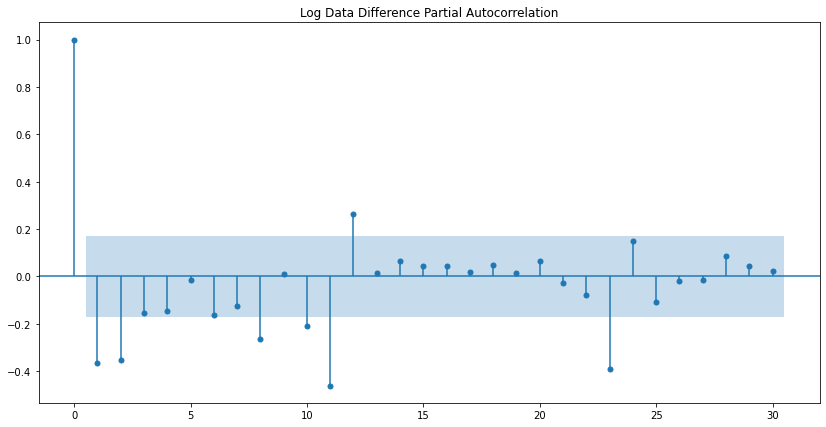

In [134]:
plot_pacf(rose_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(rose_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

#### We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.

In [135]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [136]:
SARIMA_AIC_rose_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose_log

,param,seasonal,AIC


In [137]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose_log = SARIMA_model_rose_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose_log.aic))
        SARIMA_AIC_rose_log = SARIMA_AIC_rose_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose_log.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-132.2811508841321
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-151.244020590174


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: 

SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-163.20900777080084
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-151.39741606038652


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-195.6981021193257


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-168.63061361261686
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-176.1467936067722
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-193.80943153461936


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: 

SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-182.39902107833242
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-184.19318049207516


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-184.99828084718195


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-167.6975078384536
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-189.56133415835777


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-189.050049208318


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-188.6755019005455
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-163.31782076512172


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-165.3515520056285


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-165.20270815722986
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:-180.16317688315075


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:-193.9888499719578


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.88038323158116
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:-201.16086973215872


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:-245.31562333636523


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:-215.71778313665465


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:-226.46068035197877
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:-247.07640826703775


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.17137553037313
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:-227.96854220712822


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.91037290404438


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:-213.99037737711552


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:-238.8703523133768


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:-236.8730041868172


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:-233.27824112606888


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:-211.7084801861823


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:-213.56045303354296


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:-213.9837158226101
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:-180.90674393579218


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:-195.15144478593774


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:-204.86494785545204
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:-201.89225879427786


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:-242.23212504707402


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:-211.40880003603127
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:-229.57397152067722


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:-243.81884618095475


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:-227.0706723025021
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:-229.6060688888845


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:-226.58393793792686


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:-209.78622094039613


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:-239.81418500756365


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:-237.87796138204587


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:-235.5351182466629


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:-210.5434102548726


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:-211.93556314293627


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.12841757640513
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:-148.66657556379576


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:-165.57392474613283


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:-177.05292859276815
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:-161.81472953636262


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:-210.40657410036263


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:-185.95217008389017
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:-184.88200535862978


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:-207.51664259928677


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:-195.97453601066
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:-195.19182223783673


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:-197.24859983742797


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:-184.69208894704443


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.83483594489596


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:-200.27919754603136


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:-202.83686640666812


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:-181.30079525476535


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:-181.45308965768712


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:-183.62499466691818
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:-181.82485136971945


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:-195.90180087554361


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:-206.14977983655984
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.19120461083023


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:-244.19410043636825


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:-214.22123310861681


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarni

SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:-225.8978007957412
SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.52380346242956


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:-226.36033935290723


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:-227.10895290066057


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:-225.59590672325305


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:-212.5164966690137


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:-236.63151412035333


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:-235.0347267322707


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:-233.1383755099988


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:-211.03141411898363


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:-212.88612607006576


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.3758281445037
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:-180.26441474318858


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:-193.15178444128674


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:-202.36341719069281


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:-200.3511240415673


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:-243.15204338685749


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:-209.40934448436673


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:-225.49521310551367


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:-245.792457235462


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:-225.4637542147779


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:-225.47007435933148


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:-224.61591403129017


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:-207.73619841510492


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:-235.62223961882913


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:-233.63929945041494


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:-233.3337250018956


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:-209.06037203741133


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:-211.35956310520672


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:-206.63894866111002
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:-162.05049979882875


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarni

SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:-172.67759303481262


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:-183.51513403153479
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:-170.97394380093536


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:-216.01650879310984


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarni

SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:-190.22656692533533
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:-192.7064355832733


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:-218.07090964915596


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:-201.83724555458576
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:-198.5616077738357


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:-200.15579716349393


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:-188.84022398766436


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:-206.07526372423365


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:-204.24887963977343


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:-205.9434255840147


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:-184.8484356689755


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:-186.3266999319437


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:-187.5159885785669
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:-180.18642237452679


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:-194.72043238988726


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-205.38611372010445
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-203.99973804866323


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-243.36373632919324


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-212.24003060259804


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-224.0500226556257


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-246.4719405631384


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-225.25690028032204


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-222.96973670247903


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-224.9167452805271


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-211.06129268704686


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-235.52221386905885


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-233.66212655200292


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-234.33048498377684


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-207.10470079374795


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-209.45566452798758


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.3598613066263
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-178.28757663775824


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-190.77979633068972


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-200.81603208923468


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-199.75650443806578


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-243.70797040940568


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-208.47750202147697


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-222.20025743600627


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-243.81901016150658


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-224.11787296729977


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-222.2838596577579


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-226.71108829257162


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-205.681822307308


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-231.56917873956712


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-229.9386647282136


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-231.6073809945741


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-205.0874503067876


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-207.25682696449135


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-205.58273765530558


In [138]:
SARIMA_AIC_rose_log.sort_values(by=['AIC']).head()

,param,seasonal,AIC
25,"(0, 1, 1)","(1, 0, 1, 12)",-247.076408
79,"(1, 1, 1)","(1, 0, 1, 12)",-246.523803
133,"(2, 1, 1)","(1, 0, 1, 12)",-246.471941
97,"(1, 1, 2)","(1, 0, 1, 12)",-245.792457
22,"(0, 1, 1)","(0, 1, 1, 12)",-245.315623


In [139]:
#(0, 1, 1)*(1, 0, 1, 12) AIC=-247.076408
import statsmodels.api as sm

auto_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose_log = auto_SARIMA_rose_log.fit(maxiter=1000)
print(results_auto_SARIMA_rose_log.summary())

C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 127.538
Date:                            Sat, 16 Jul 2022   AIC                           -247.076
Time:                                    09:40:28   BIC                           -236.028
Sample:                                01-01-1980   HQIC                          -242.591
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0652      0.058    -18.389      0.000      -1.179      -0.952
ar.S.L12       0.9555      0.028   

In [ ]:
results_auto_SARIMA_rose_log.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [141]:
predicted_auto_SARIMA_rose_log = results_auto_SARIMA_rose_log.get_forecast(steps=len(SARIMA_test['Rose']))

In [142]:
predicted_auto_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1.754737,0.076365,1.605065,1.904410
1991-02-01,1.821758,0.076457,1.671905,1.971612
1991-03-01,1.848382,0.076600,1.698249,1.998515
1991-04-01,1.821981,0.076742,1.671569,1.972392
1991-05-01,1.839047,0.076884,1.688357,1.989737


In [143]:
# Extract the predicted and true values of our time series
rose_forecasted_log = predicted_auto_SARIMA_rose_log.predicted_mean
SARIMA_test['rose_forecasted_log'] = np.power(10, predicted_auto_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

,Rose,rose_forecasted,rose_forecasted_log
YearMonth,,,
1991-01-01,54.0,44.214702,56.850909
1991-02-01,55.0,62.327974,66.337363
1991-03-01,66.0,67.315152,70.531259
1991-04-01,65.0,63.162471,66.371329
1991-05-01,60.0,66.476733,69.031507


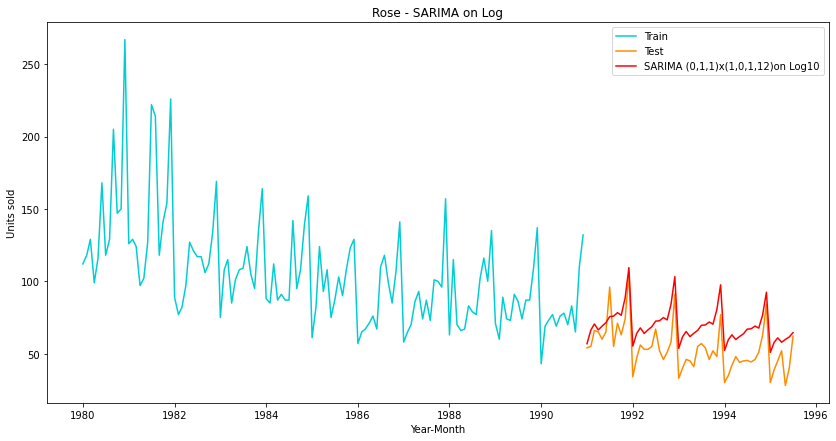

In [144]:
plt.plot(SARIMA_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(SARIMA_test['Rose'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['rose_forecasted_log'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Rose - SARIMA on Log')
plt.legend(loc='best');

In [145]:
rmse_SARIMA_auto_model_log = metrics.mean_squared_error(SARIMA_test['Rose'],SARIMA_test['rose_forecasted_log'],squared=False)
print("For Auto-SARIMA_log Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_auto_model_log))

For Auto-SARIMA_log Model forecast on the Test Data, RMSE is 17.920


In [146]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model_log]}
                           ,index=['Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_11])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202


# 1.7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Model-10 Manual ARIMA

Look at the ACF and the PACF plots once more.

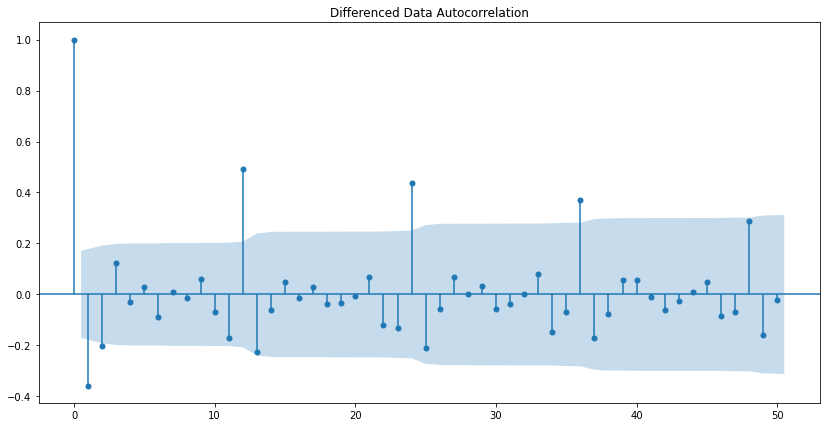

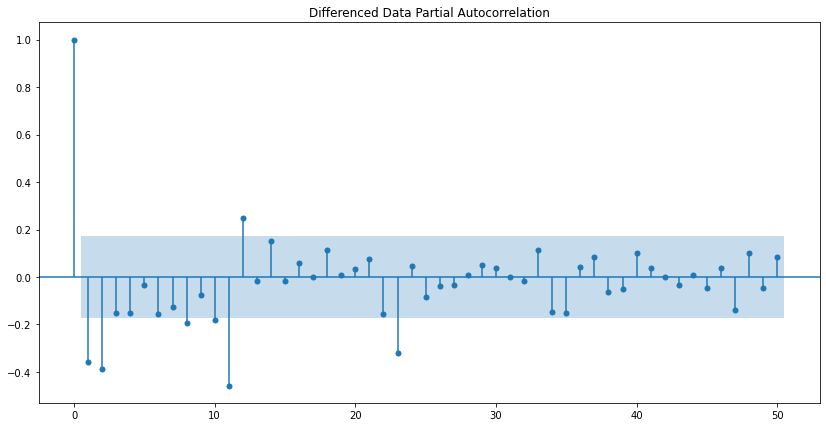

In [147]:
plot_acf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Here, we have taken alpha=0.05.

- The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
- The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

We get a comparatively simpler model by looking at the ACF and the PACF plots.

#### Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.

In [148]:
manual_ARIMA = ARIMA(train_rose['Rose'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.576
Method:                           css   S.D. of innovations             38.931
Date:                Sat, 16 Jul 2022   AIC                           1335.153
Time:                        09:40:30   BIC                           1340.903
Sample:                    02-01-1980   HQIC                          1337.489
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1527      3.401      0.045      0.964      -6.514       6.819


C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


## Predict on the Test Set using this model and evaluate the model

In [149]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_rose['Rose']))

In [150]:
rmse_arima_manual_model = metrics.mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA[0],squared=False)
print("For Manual-ARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_arima_manual_model))

For Manual-ARIMA Model forecast on the Test Data, RMSE is 84.160


#### The data has some seasonality so we should build a SARIMA model to get better accuracy.

In [151]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse_arima_manual_model]}
                           ,index=['Manual_ARIMA(0,1,0)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_12])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202


## Model-11 Manual SARIMA

Look at the ACF and the PACF plots once more.

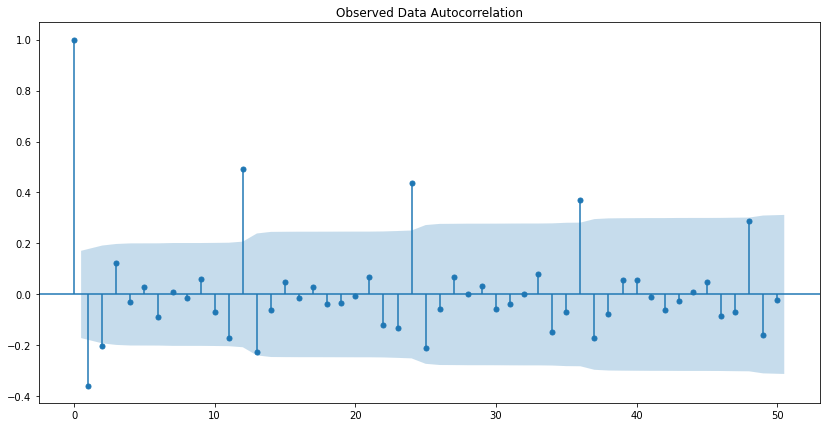

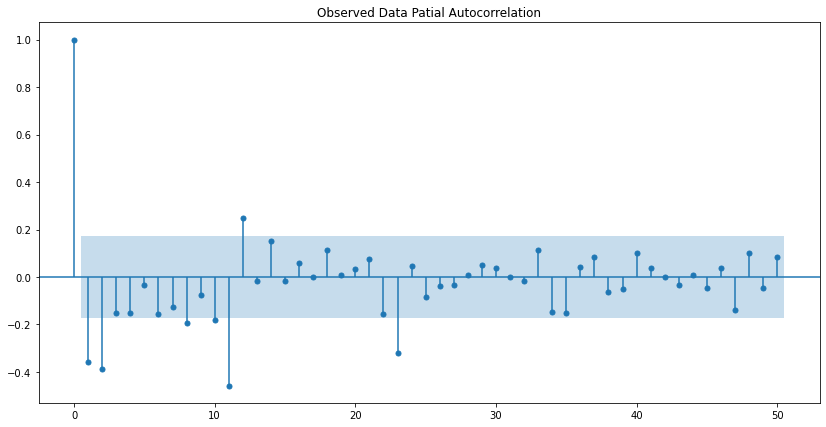

In [152]:
plot_acf(SARIMA_train['Rose'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(SARIMA_train['Rose'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

#### We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

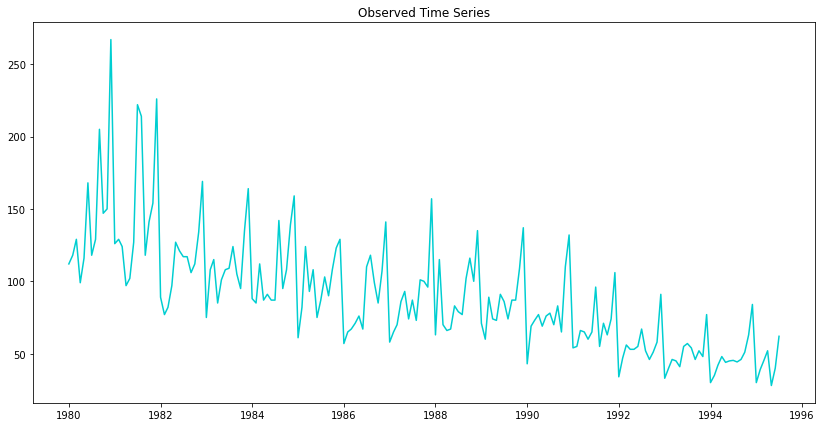

In [153]:
plt.plot(rose['Rose'], color = 'darkturquoise')
plt.title ('Observed Time Series');

#### We see that there is both significant trend and seasonality. So, now we take a seasonal differencing and check the series.

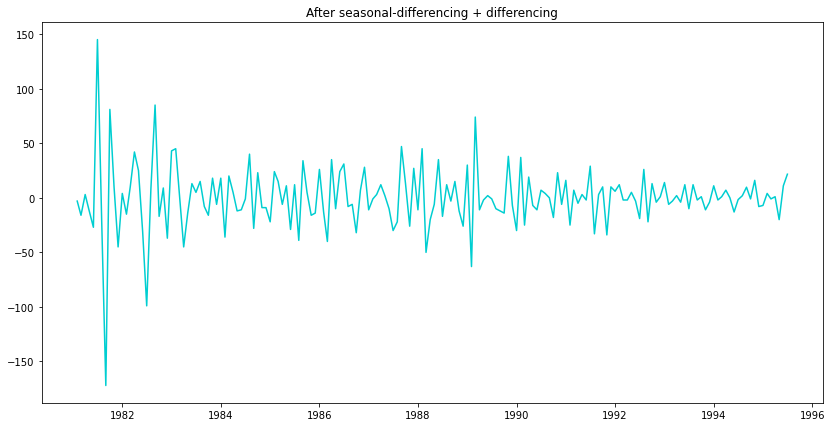

In [154]:
plt.plot((rose['Rose'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

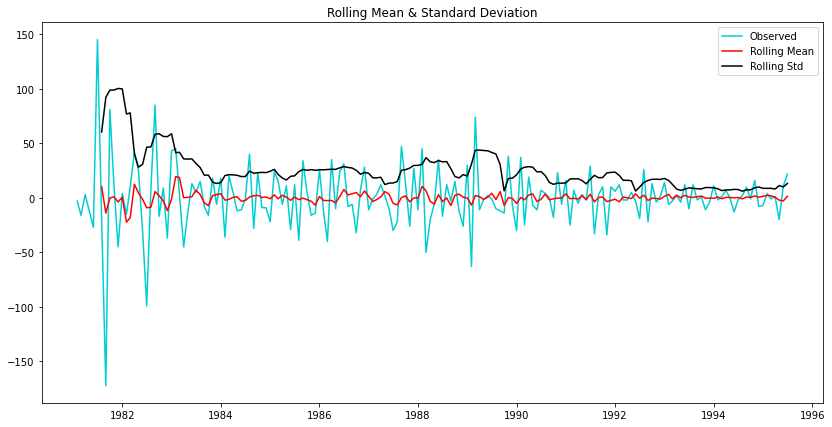

Results of Dickey-Fuller Test:
Test Statistic                  -4.605791
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [155]:
test_stationarity((rose['Rose'].diff(12).dropna()).diff().dropna(),'darkturquoise')

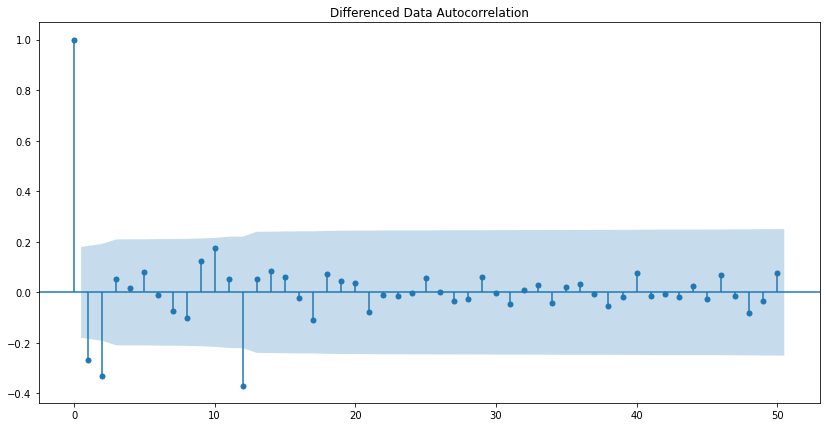

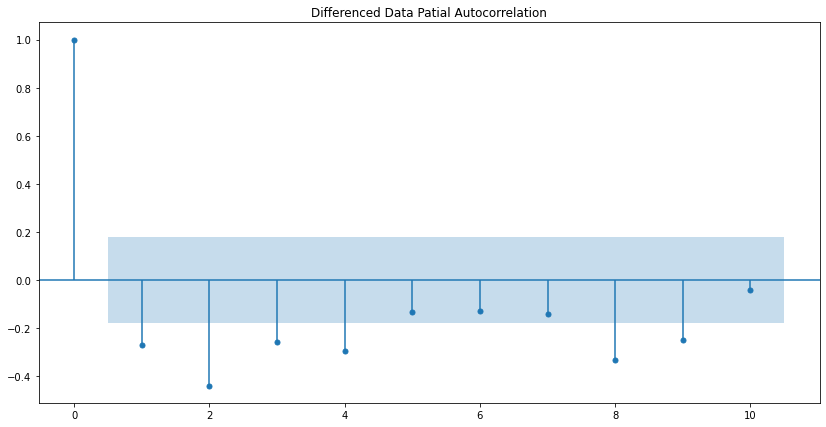

In [156]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [157]:
#(4, 1, 2)*(0, 1, 2, 12)
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Sat, 16 Jul 2022   AIC                            786.737
Time:                                    09:40:34   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

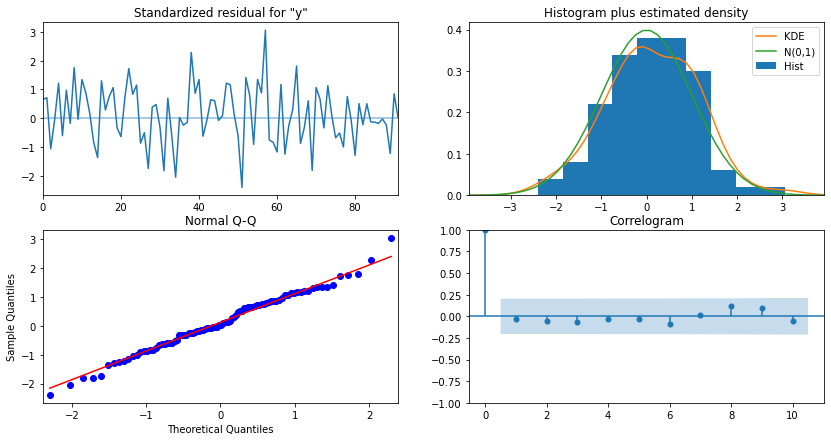

In [158]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model

In [159]:
predicted_manual_SARIMA = results_manual_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']))

In [160]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.733041,15.552666,14.250375,75.215706
1,64.208694,16.000767,32.847766,95.569621
2,65.110690,16.074606,33.605040,96.616339
3,68.453063,16.150996,36.797692,100.108433
4,61.423433,16.154556,29.761086,93.085781


In [161]:
# Extract the predicted and true values of our time series
manual_rose_forecasted = predicted_manual_SARIMA.predicted_mean
SARIMA_test['manual_rose_forecasted'] = predicted_manual_SARIMA.predicted_mean
SARIMA_test.head()

,Rose,rose_forecasted,rose_forecasted_log,manual_rose_forecasted
YearMonth,,,,
1991-01-01,54.0,44.214702,56.850909,44.733041
1991-02-01,55.0,62.327974,66.337363,64.208694
1991-03-01,66.0,67.315152,70.531259,65.110690
1991-04-01,65.0,63.162471,66.371329,68.453063
1991-05-01,60.0,66.476733,69.031507,61.423433


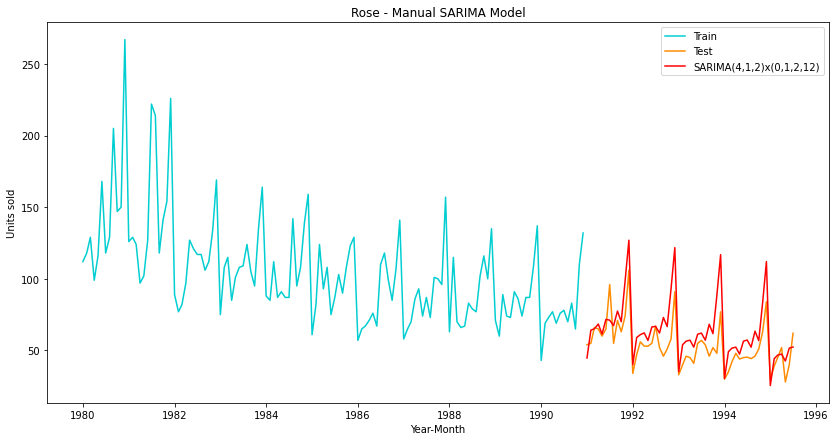

In [162]:
plt.plot(SARIMA_train['Rose'], label='Train', color = 'darkturquoise')
plt.plot(SARIMA_test['Rose'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['manual_rose_forecasted'], color='red', label='SARIMA(4,1,2)x(0,1,2,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Manual SARIMA Model')
plt.legend(loc='best');

In [163]:
rmse_SARIMA_manual_model = metrics.mean_squared_error(SARIMA_test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print("For Manual-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_manual_model))

For Manual-SARIMA Model forecast on the Test Data, RMSE is 15.389


In [164]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual_model]}
                           ,index=['Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_13])
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202


# 1.8 Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [165]:
rose_resultsDf

,Test RMSE
RegressionOnTime,15.278369
NaiveModel,79.745697
SimpleAverage,53.488233
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
"Alpha=0.0987, SES Optimized",36.824464
"Alpha=0.10,SES_Iterative",36.856268
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202


# 1.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [166]:
rose_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative",9.943563
2 point TMA,11.530054
4 point TMA,14.458402
6 point TMA,14.572976
9 point TMA,14.732918
RegressionOnTime,15.278369
"Manual_SARIMA(4, 1, 2)*(0, 1, 2, 12)",15.388806
"Auto_ARIMA(0, 1, 2)",15.627280
"Alpha=0.0,Beta=0.0, DES Optimized",15.718202
"Auto_SARIMA(0, 1, 2)*(2, 1, 2, 12)",16.529473


## Build model on the entire dataset using best optimum model:

#### which is Alpha=0.1,Beta=0.2,gamma=0.3,TES_Iterative or 2 point TMA

### Building a TES with param[Alpha=0.1,Beta=0.2,gamma=0.3] on the entire Rose dataset###

In [167]:
Full_model_TES_rose = ExponentialSmoothing(rose['Rose'],trend='additive',seasonal='multiplicative')
Full_model_TES_rose_fit = Full_model_TES_rose.fit(smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.3,optimized=True,use_brute=True)
TES_rose_forecast = Full_model_TES_rose_fit.forecast(steps=12)

C:\Users\Aishwarya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [168]:
rmse_rose_tes_full = metrics.mean_squared_error(rose['Rose'],Full_model_TES_rose_fit.fittedvalues,squared=False)
print("For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is %3.3f" %(rmse_rose_tes_full))

For Triple Exponential Smoothing Model forecast on the Entire Data, RMSE is 17.887


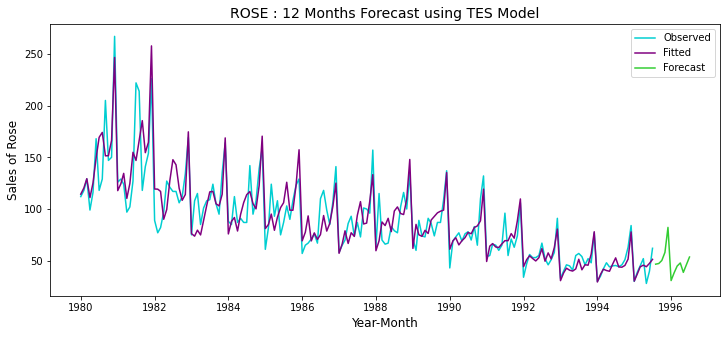

In [169]:
plt.figure(figsize=(12,5))

plt.plot(rose['Rose'], label='Observed', color = 'darkturquoise')
plt.plot(Full_model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

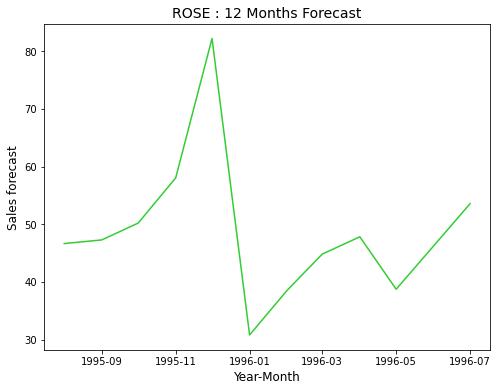

In [170]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14);

# 1.10 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [171]:
TES_rose_forecast

1995-08-01    46.645790
1995-09-01    47.277864
1995-10-01    50.192393
1995-11-01    58.032965
1995-12-01    82.211766
1996-01-01    30.793144
1996-02-01    38.536058
1996-03-01    44.822234
1996-04-01    47.814473
1996-05-01    38.727986
1996-06-01    46.255070
1996-07-01    53.559025
Freq: MS, dtype: float64

In [172]:
TES_rose_forecast.describe()

count    12.000000
mean     48.739064
std      12.747211
min      30.793144
25%      43.298672
50%      46.961827
75%      51.034051
max      82.211766
dtype: float64

In [173]:
TES_rose_forecast.sum()

584.8687673172052

## Inferences:


- The model forecasts sale of 585 units of Rose wine in 12 months into future. Which is an average sale of 48 units per month.
- The seasonal sale in December 1995 will reach a maximum of 82 units, before it drops to the lowest sale in January 1996; at 30 units.
- Unlike Sparkling wine, Rose wine sells very low number of units and the standard deviation is only 12.75. Which means that higher demand does not impact procurement and production.
- The ABC estate wine should investigate the low demand for Rose wine in market and make corrective actions in marketing and promotions.